In [16]:
"""
All pytorch pipline is copied by https://www.kaggle.com/sdelecourt/cnn-with-pytorch-for-mnist

"""


import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import pyvista as pv
import numpy as np
import os
from PIL import Image
import glob


if not os.path.exists("conv"):
    os.makedirs("conv")


# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Hyper parameters
num_epochs = 20
num_classes = 10
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../../data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data/',
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

In [17]:
# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2)
        self.bn2d_1 = nn.BatchNorm2d(16)
        self.relu_1 = nn.ReLU()
        self.maxpool_1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2)
        self.bn2d_2 = nn.BatchNorm2d(32)
        self.relu_2 = nn.ReLU()
        self.maxpool_2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(7*7*32, num_classes)
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.bn2d_1(out)
        out = self.relu_1(out)
        out = self.maxpool_1(out)
        out = self.conv2(out)
        out = self.bn2d_2(out)
        out = self.maxpool_2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

model = ConvNet(num_classes).to(device)


# Init 2D meshgrid modeling

## 1. Meshgrid block adding CONV1

### 1.1 weight block

In [18]:
BLOCK_VALUE = model.conv1.weight.cpu().detach().numpy()

CONV_BLOCK = np.zeros((20,20))
for index in range(0,16):
    x =  ((index)%4)*5 
    y =  (index//4)*5
    CONV_BLOCK[x:x+5, y:y+5] =BLOCK_VALUE[index][0] 

In [19]:
model.conv1.weight.shape

torch.Size([16, 1, 5, 5])

### 1.2 bias block

In [20]:
# BLOCK_VALUE = model.conv1.bias.cpu().detach().numpy()

# WEIGHT_BLOCK = np.zeros((20,20))
# for index in range(0,16):
#     x =  ((index)%4)*5 
#     y =  (index//4)*5
#     WEIGHT_BLOCK[x:x+5, y:y+5] =BLOCK_VALUE[index]

### 1.3  init block visualization

In [21]:
x = np.arange(0, 20, 1)
y = np.arange(0, 20, 1)
x, y = np.meshgrid(x, y)
z = CONV_BLOCK*20

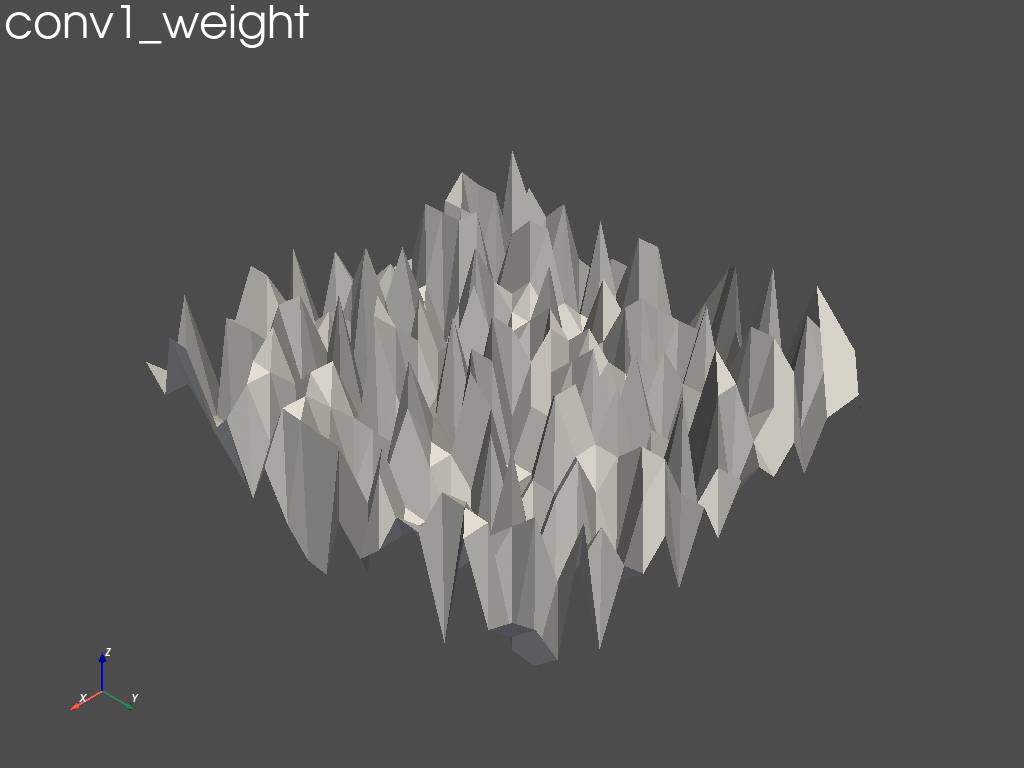

[(40.20773253399004, 40.20773253399004, 30.707732533990036),
 (9.5, 9.5, 0.0),
 (0.0, 0.0, 1.0)]

In [22]:
grid = pv.StructuredGrid(x, y, z)
grid.plot(text ="conv1_weight")

Epoch [1/20], Step [100/600], Loss: 0.0921
Epoch [1/20], Step [200/600], Loss: 0.0614


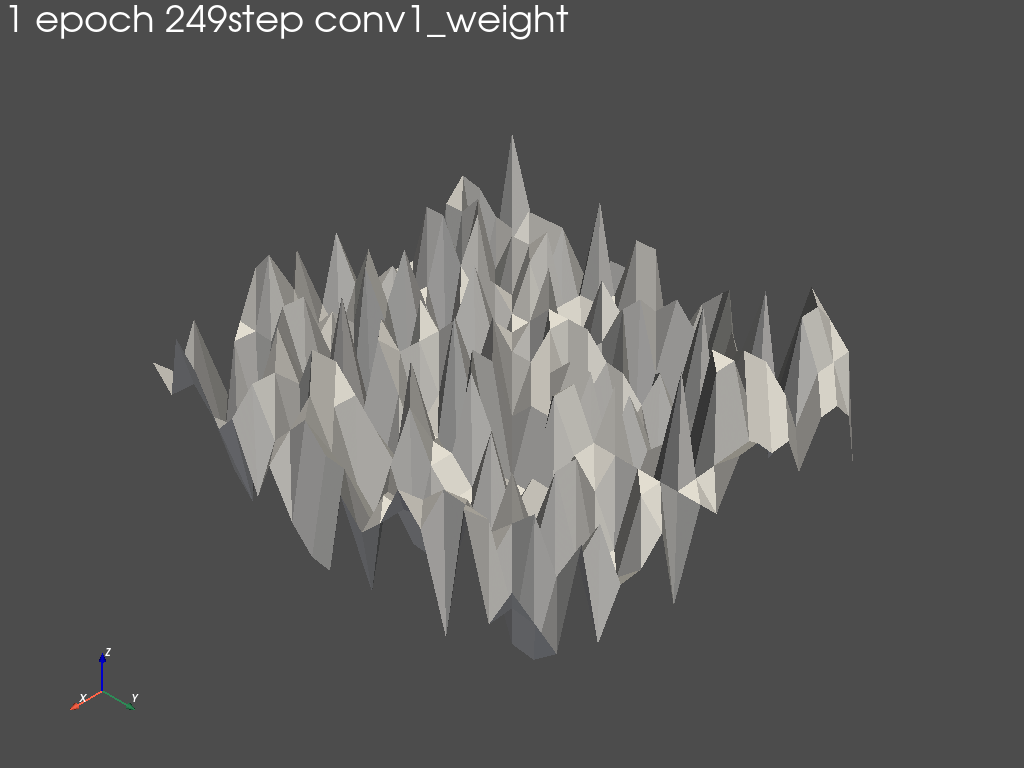

Epoch [1/20], Step [300/600], Loss: 0.1632
Epoch [1/20], Step [400/600], Loss: 0.0366


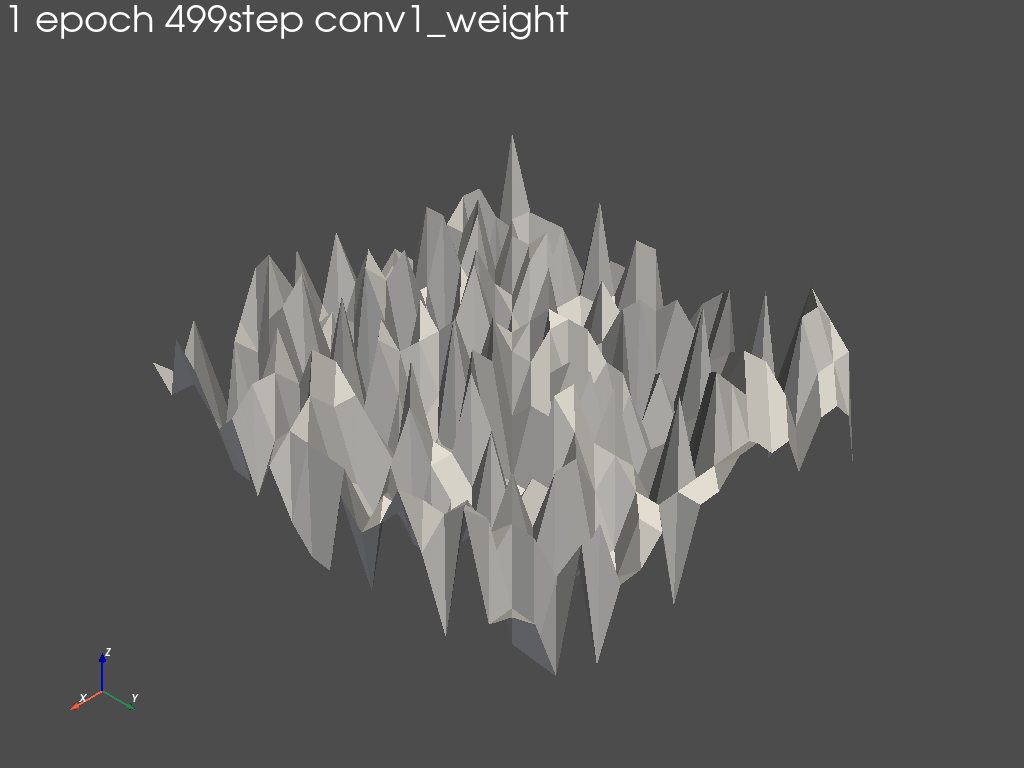

Epoch [1/20], Step [500/600], Loss: 0.0602
Epoch [1/20], Step [600/600], Loss: 0.0657
Epoch [2/20], Step [100/600], Loss: 0.0650
Epoch [2/20], Step [200/600], Loss: 0.1029


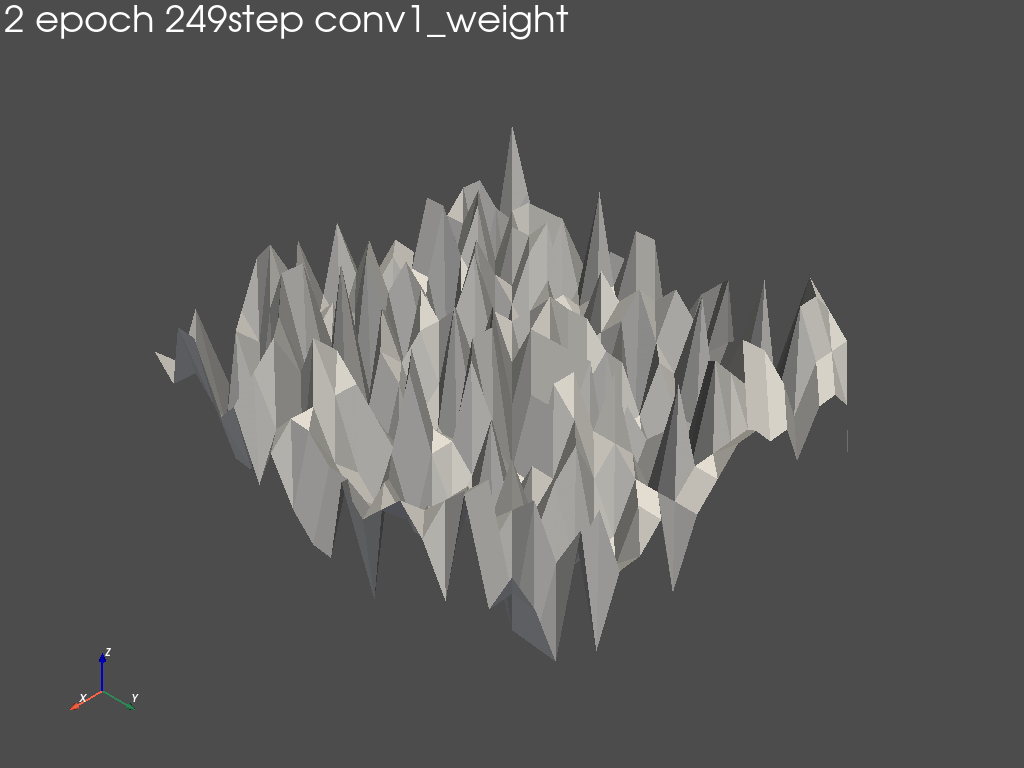

Epoch [2/20], Step [300/600], Loss: 0.2592
Epoch [2/20], Step [400/600], Loss: 0.0431


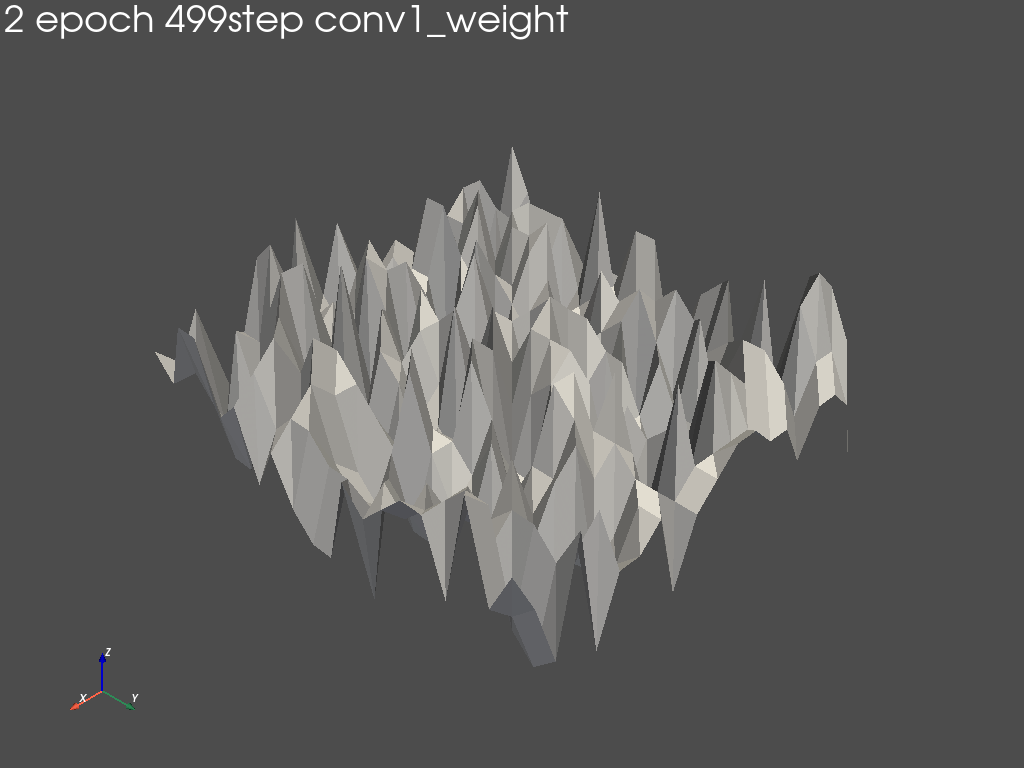

Epoch [2/20], Step [500/600], Loss: 0.0299
Epoch [2/20], Step [600/600], Loss: 0.0496
Epoch [3/20], Step [100/600], Loss: 0.0322
Epoch [3/20], Step [200/600], Loss: 0.0208


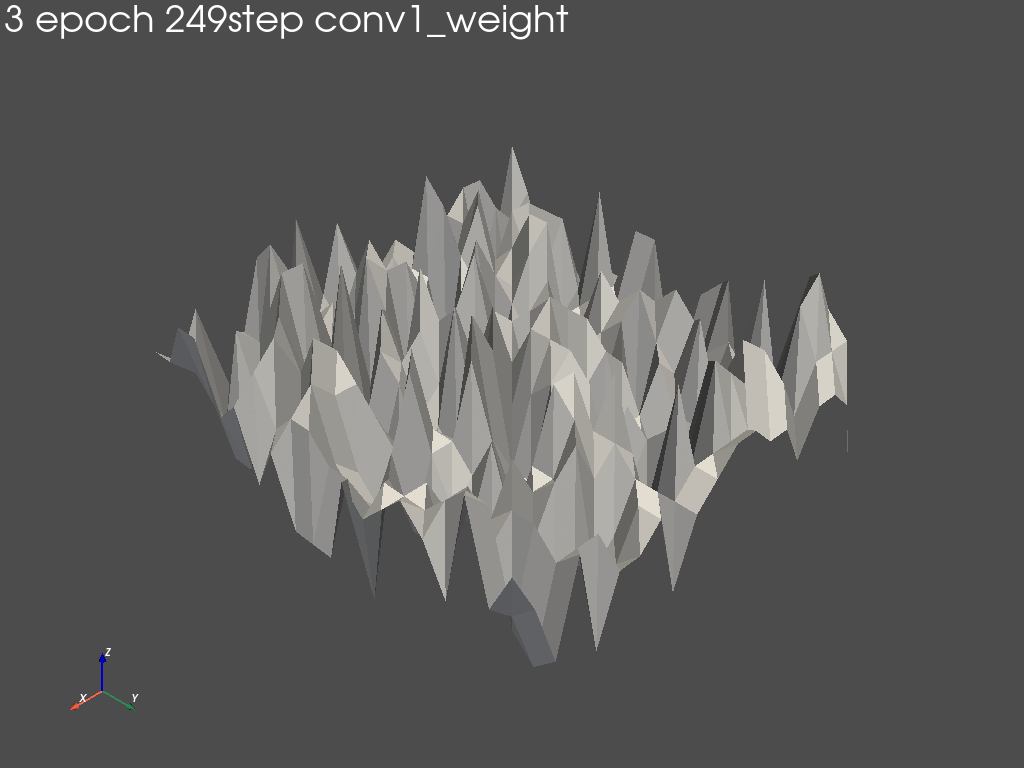

Epoch [3/20], Step [300/600], Loss: 0.0159
Epoch [3/20], Step [400/600], Loss: 0.0472


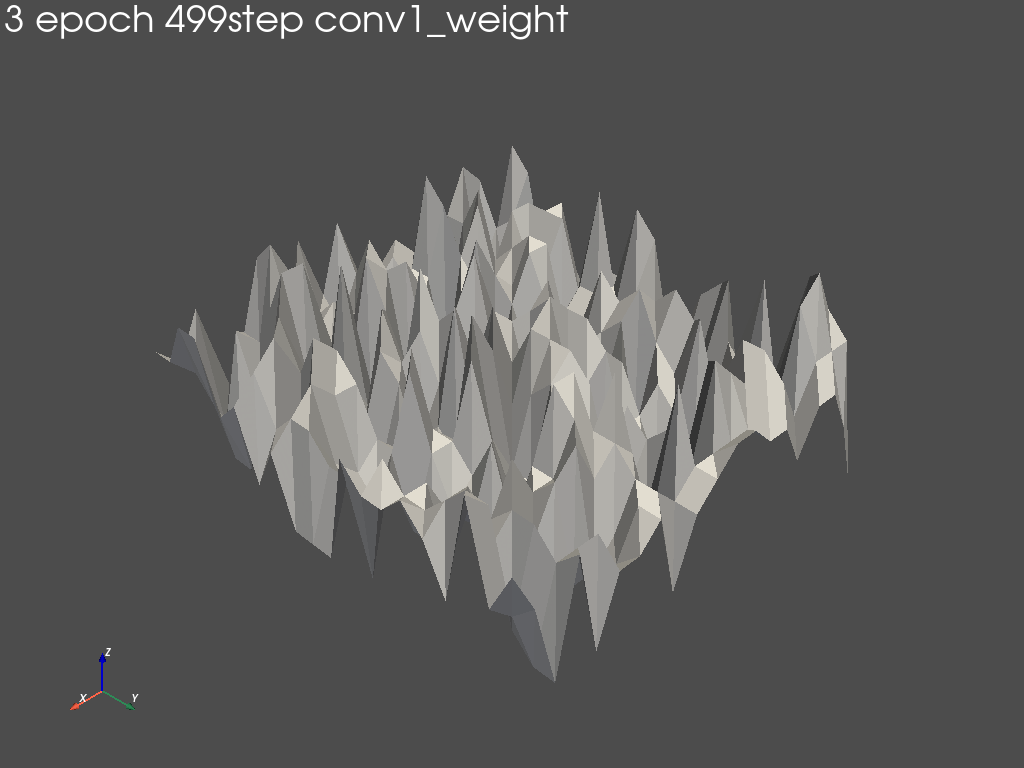

Epoch [3/20], Step [500/600], Loss: 0.0105
Epoch [3/20], Step [600/600], Loss: 0.0193
Epoch [4/20], Step [100/600], Loss: 0.0120
Epoch [4/20], Step [200/600], Loss: 0.1202


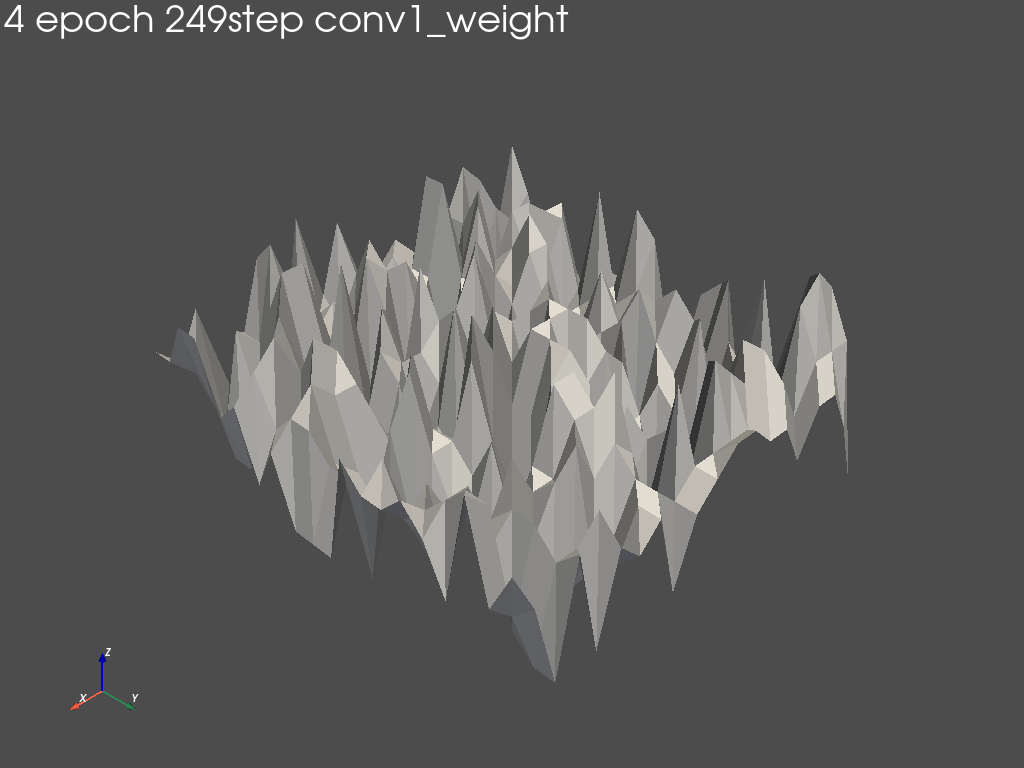

Epoch [4/20], Step [300/600], Loss: 0.0191
Epoch [4/20], Step [400/600], Loss: 0.0265


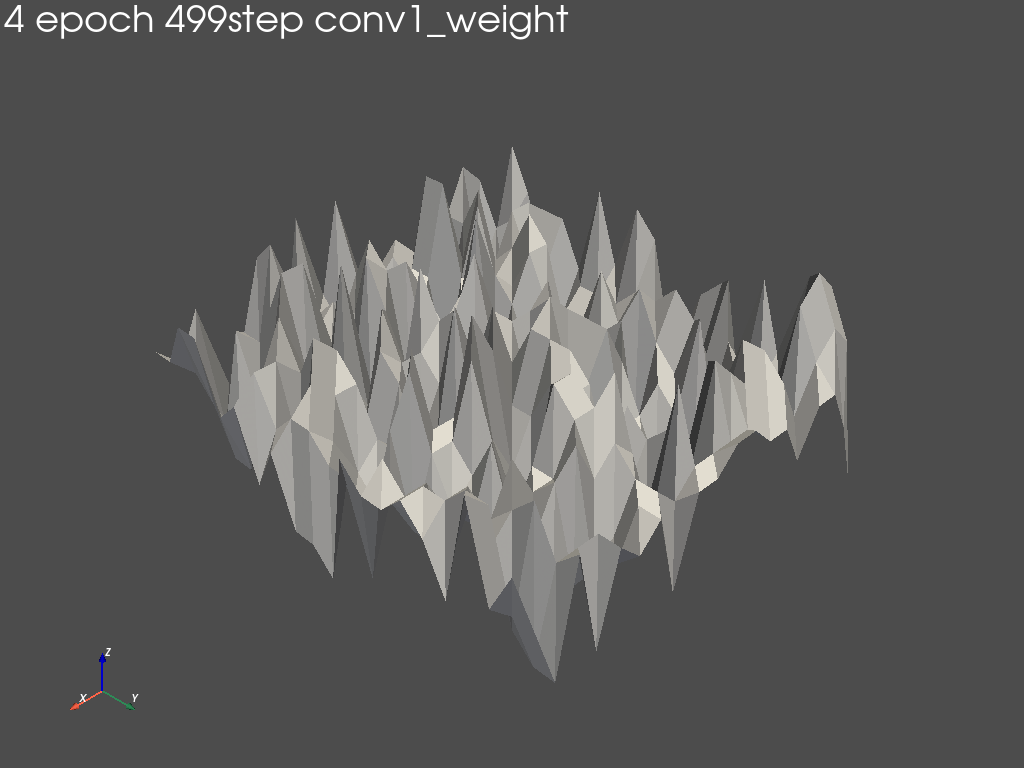

Epoch [4/20], Step [500/600], Loss: 0.0626
Epoch [4/20], Step [600/600], Loss: 0.0107
Epoch [5/20], Step [100/600], Loss: 0.0109
Epoch [5/20], Step [200/600], Loss: 0.0325


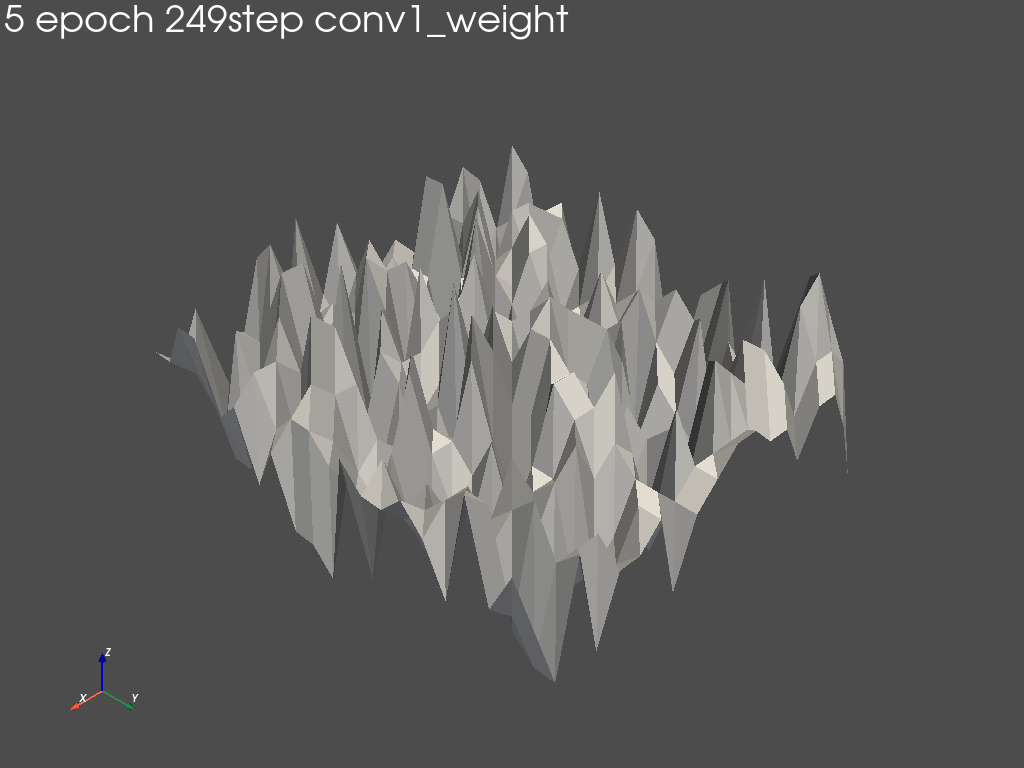

Epoch [5/20], Step [300/600], Loss: 0.0202
Epoch [5/20], Step [400/600], Loss: 0.0140


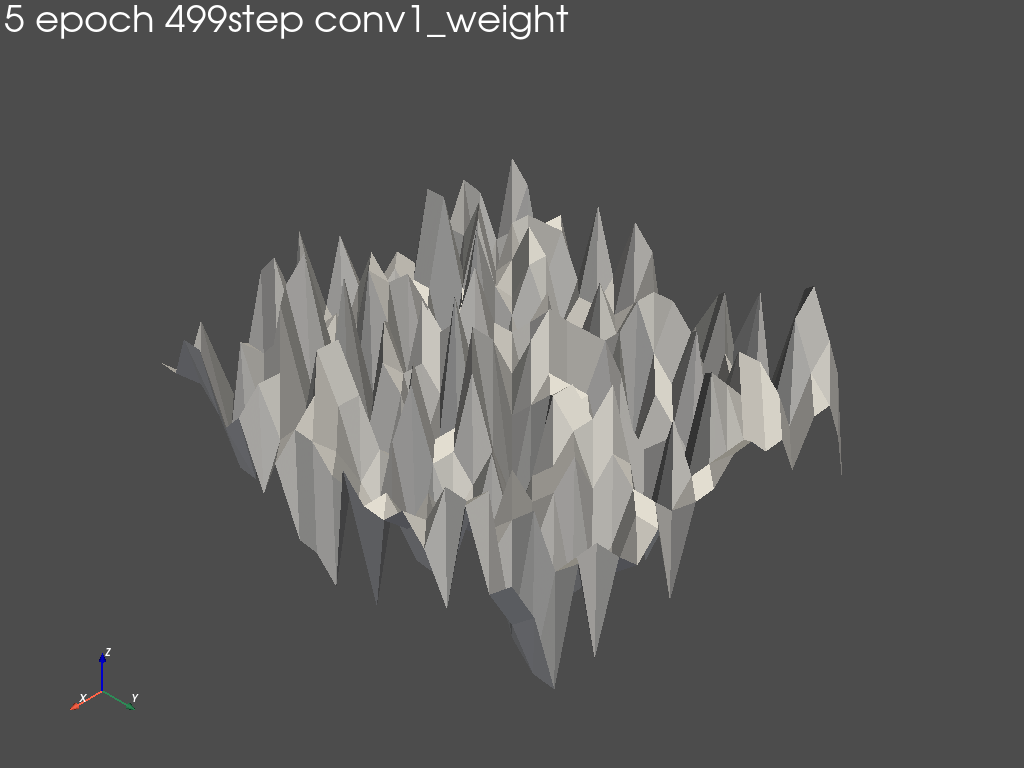

Epoch [5/20], Step [500/600], Loss: 0.0783
Epoch [5/20], Step [600/600], Loss: 0.0283
Epoch [6/20], Step [100/600], Loss: 0.0122
Epoch [6/20], Step [200/600], Loss: 0.0516


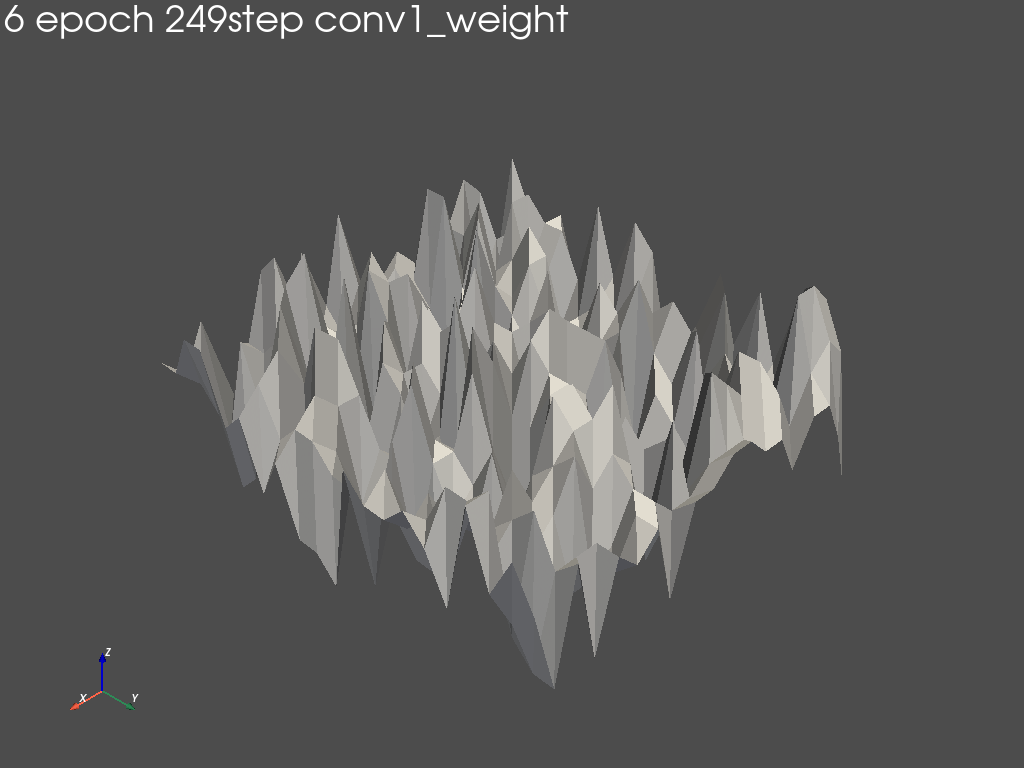

Epoch [6/20], Step [300/600], Loss: 0.0310
Epoch [6/20], Step [400/600], Loss: 0.0536


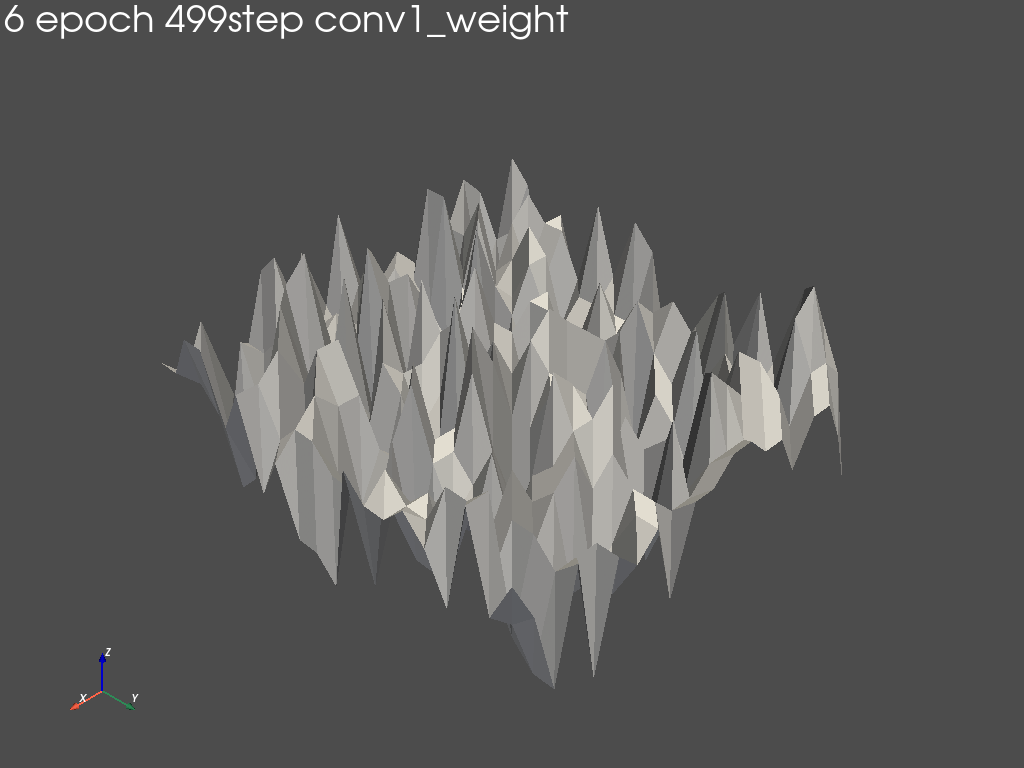

Epoch [6/20], Step [500/600], Loss: 0.0363
Epoch [6/20], Step [600/600], Loss: 0.0205
Epoch [7/20], Step [100/600], Loss: 0.0125
Epoch [7/20], Step [200/600], Loss: 0.0219


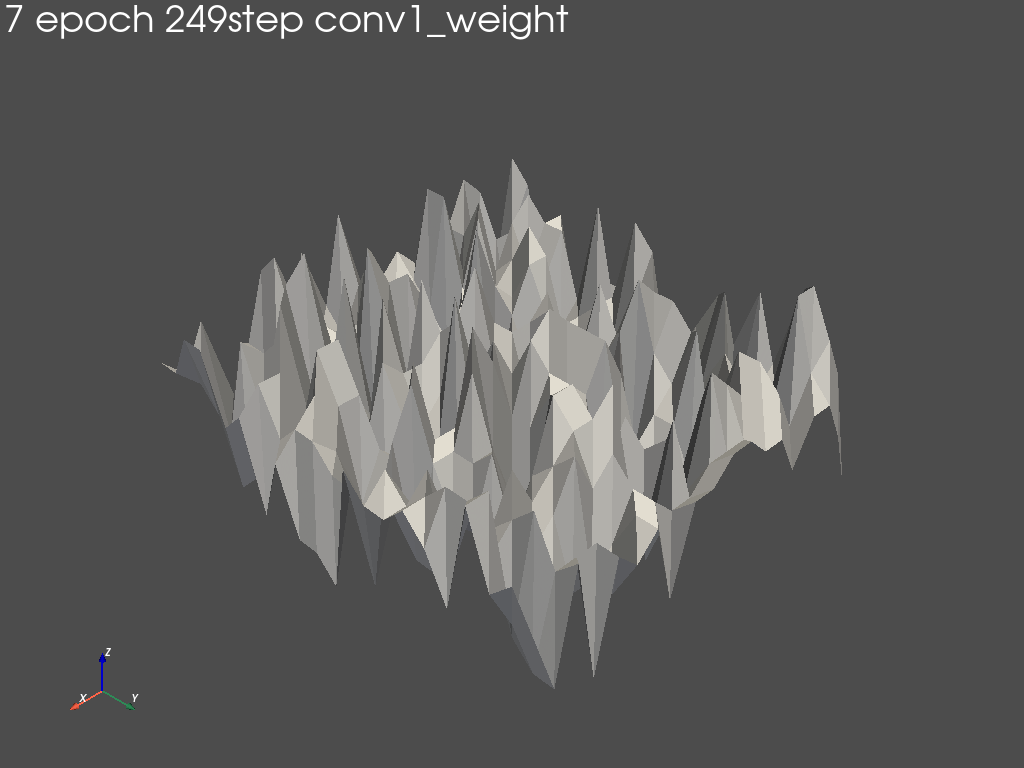

Epoch [7/20], Step [300/600], Loss: 0.0228
Epoch [7/20], Step [400/600], Loss: 0.0134


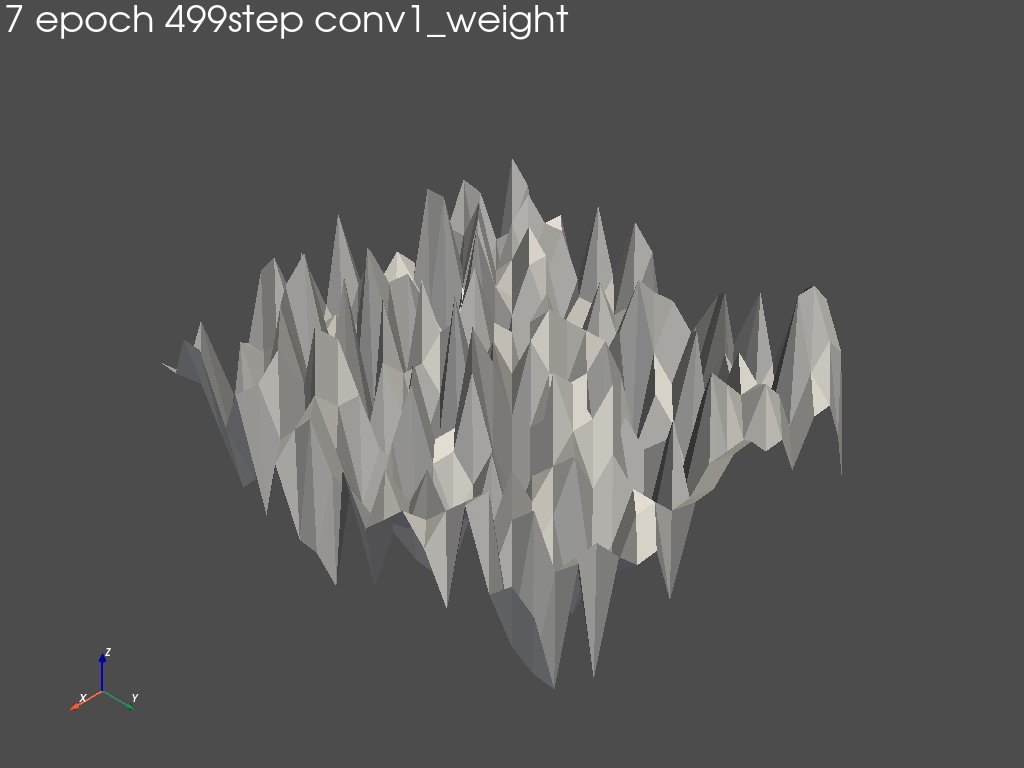

Epoch [7/20], Step [500/600], Loss: 0.0345
Epoch [7/20], Step [600/600], Loss: 0.1098
Epoch [8/20], Step [100/600], Loss: 0.0065
Epoch [8/20], Step [200/600], Loss: 0.0207


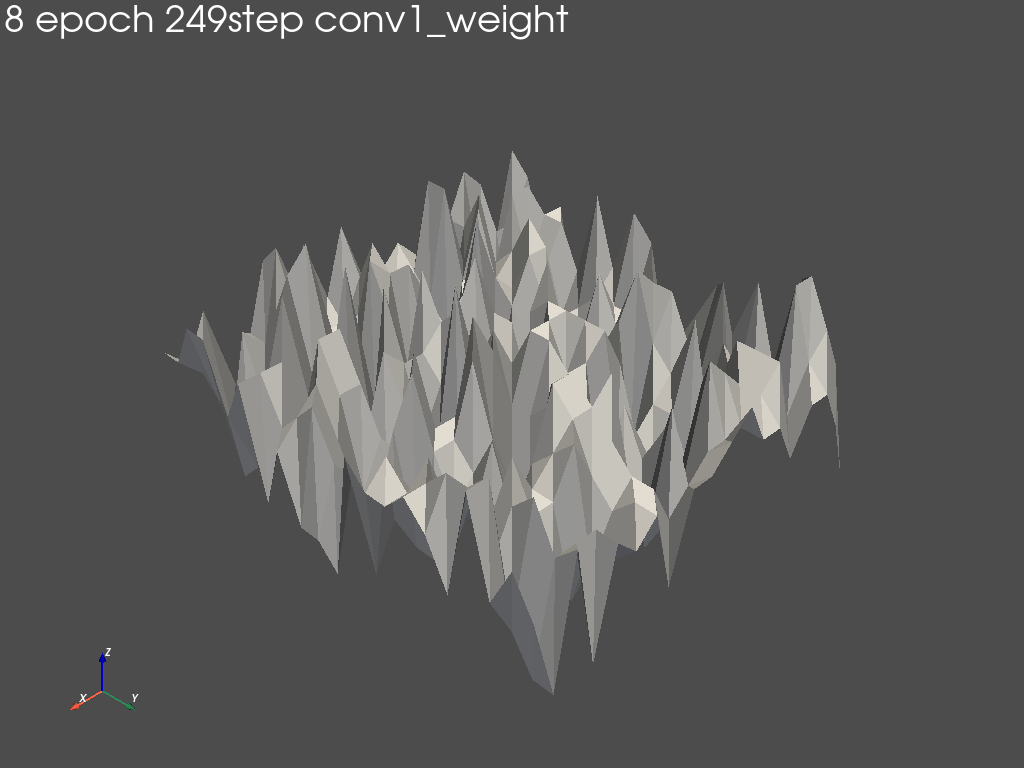

Epoch [8/20], Step [300/600], Loss: 0.0234
Epoch [8/20], Step [400/600], Loss: 0.0337


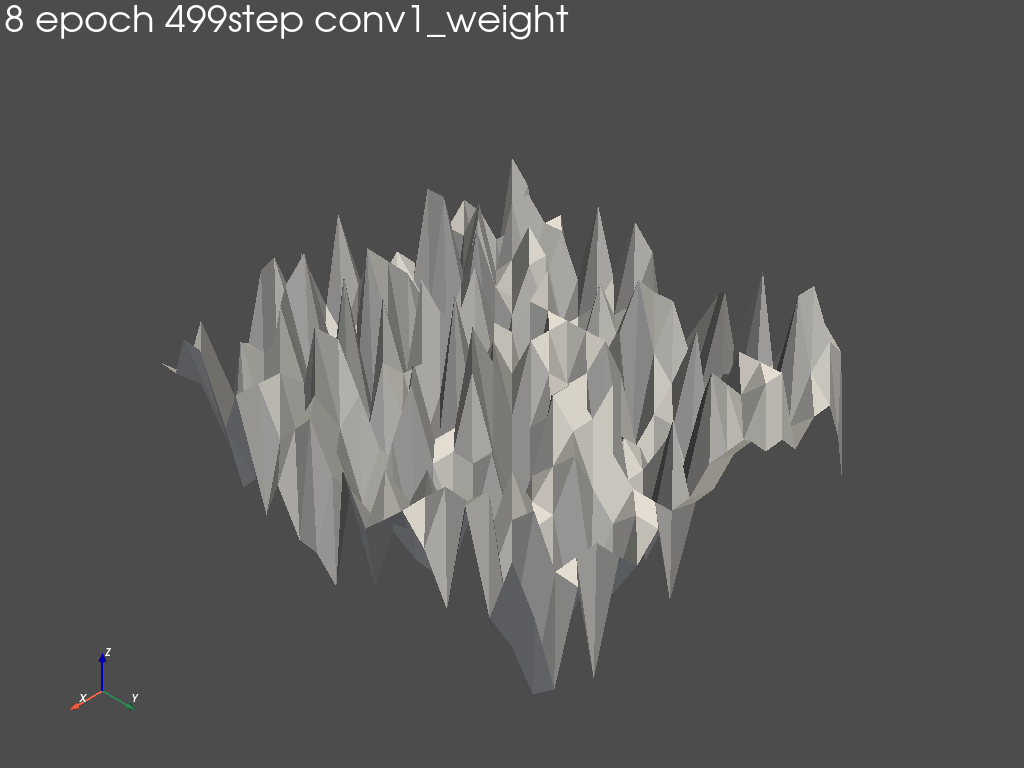

Epoch [8/20], Step [500/600], Loss: 0.0401
Epoch [8/20], Step [600/600], Loss: 0.0038
Epoch [9/20], Step [100/600], Loss: 0.0320
Epoch [9/20], Step [200/600], Loss: 0.0061


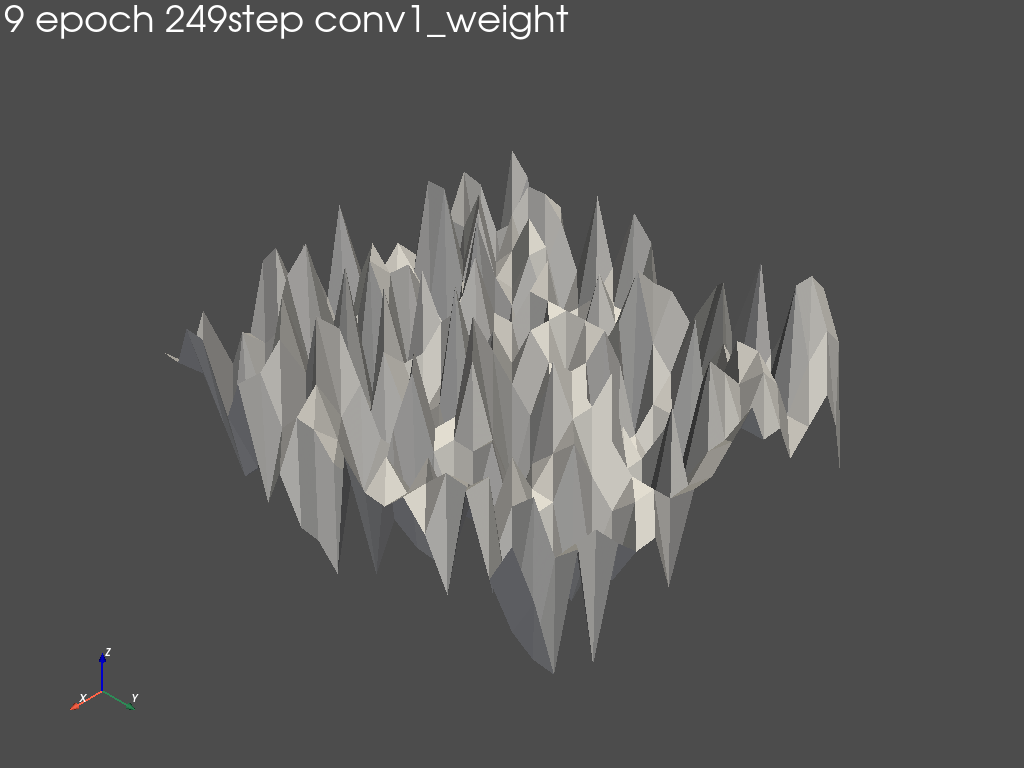

Epoch [9/20], Step [300/600], Loss: 0.0017
Epoch [9/20], Step [400/600], Loss: 0.0893


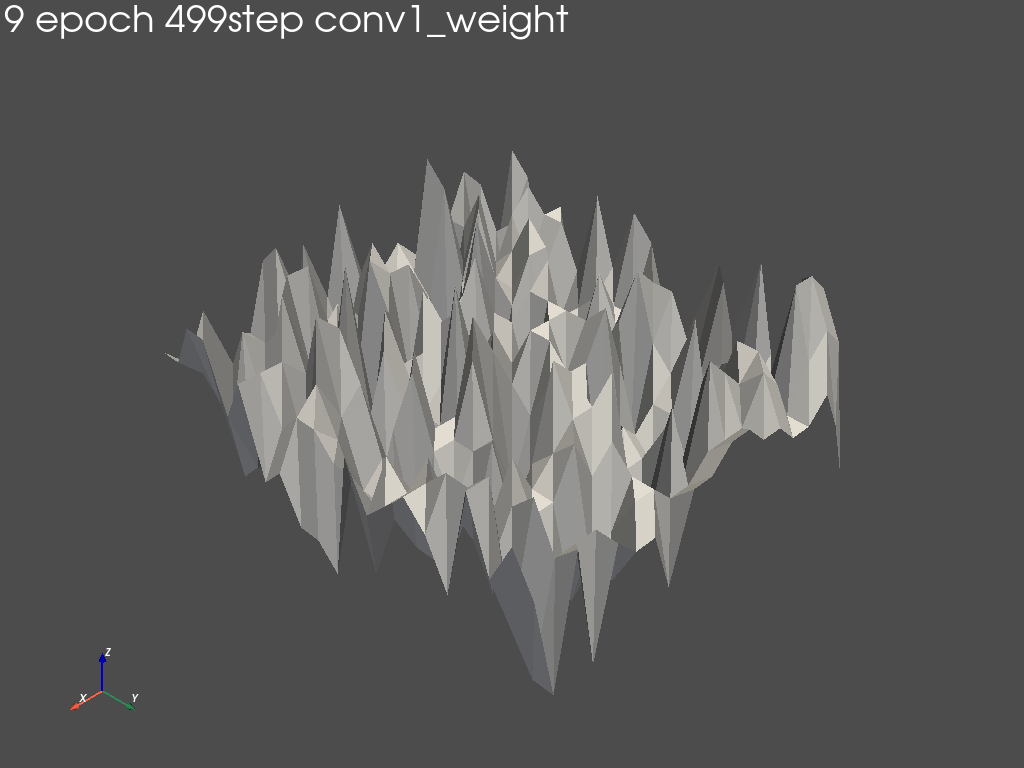

Epoch [9/20], Step [500/600], Loss: 0.0033
Epoch [9/20], Step [600/600], Loss: 0.0065
Epoch [10/20], Step [100/600], Loss: 0.0011
Epoch [10/20], Step [200/600], Loss: 0.0251


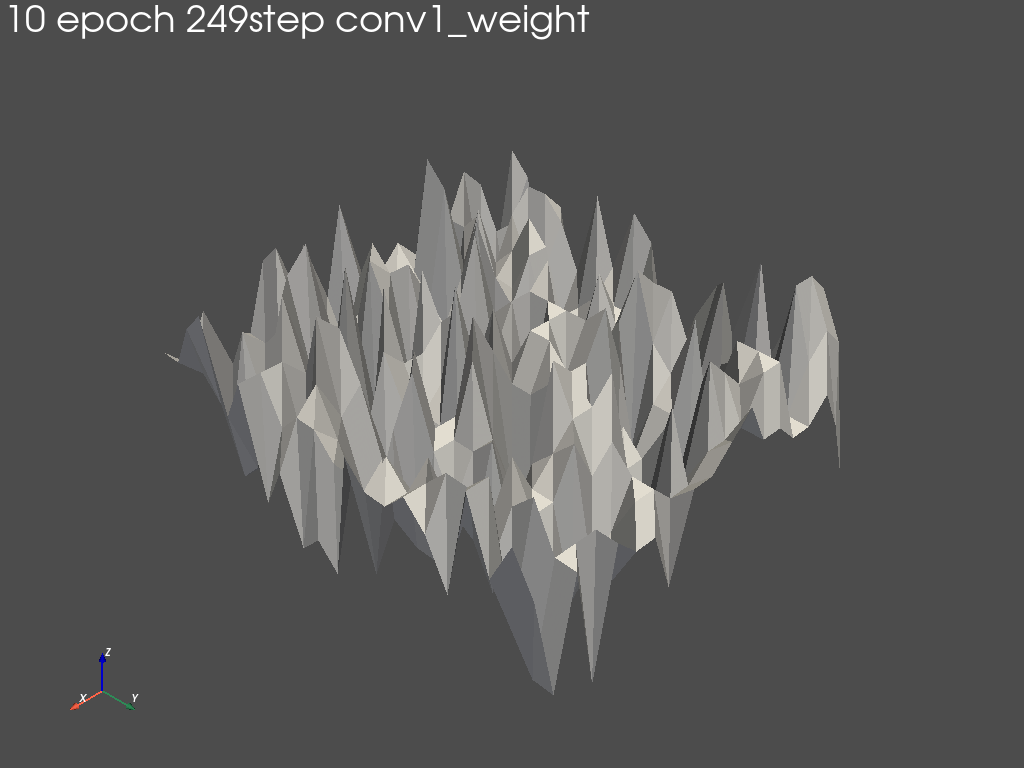

Epoch [10/20], Step [300/600], Loss: 0.0212
Epoch [10/20], Step [400/600], Loss: 0.0081


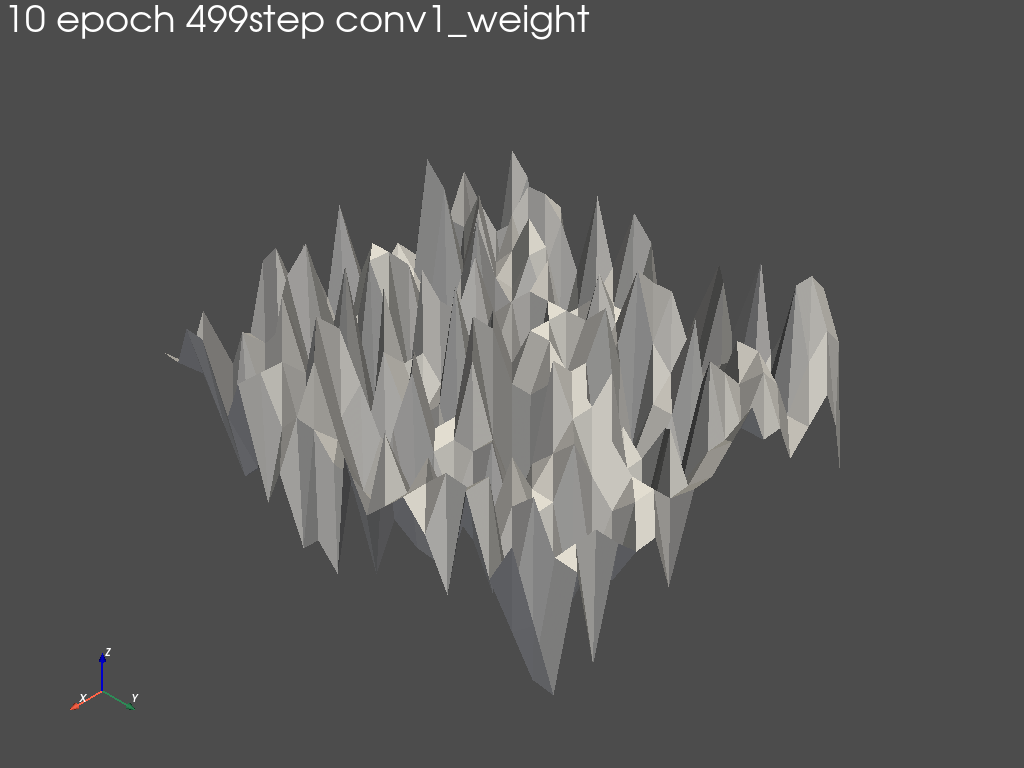

Epoch [10/20], Step [500/600], Loss: 0.0063
Epoch [10/20], Step [600/600], Loss: 0.0222
Epoch [11/20], Step [100/600], Loss: 0.0034
Epoch [11/20], Step [200/600], Loss: 0.0003


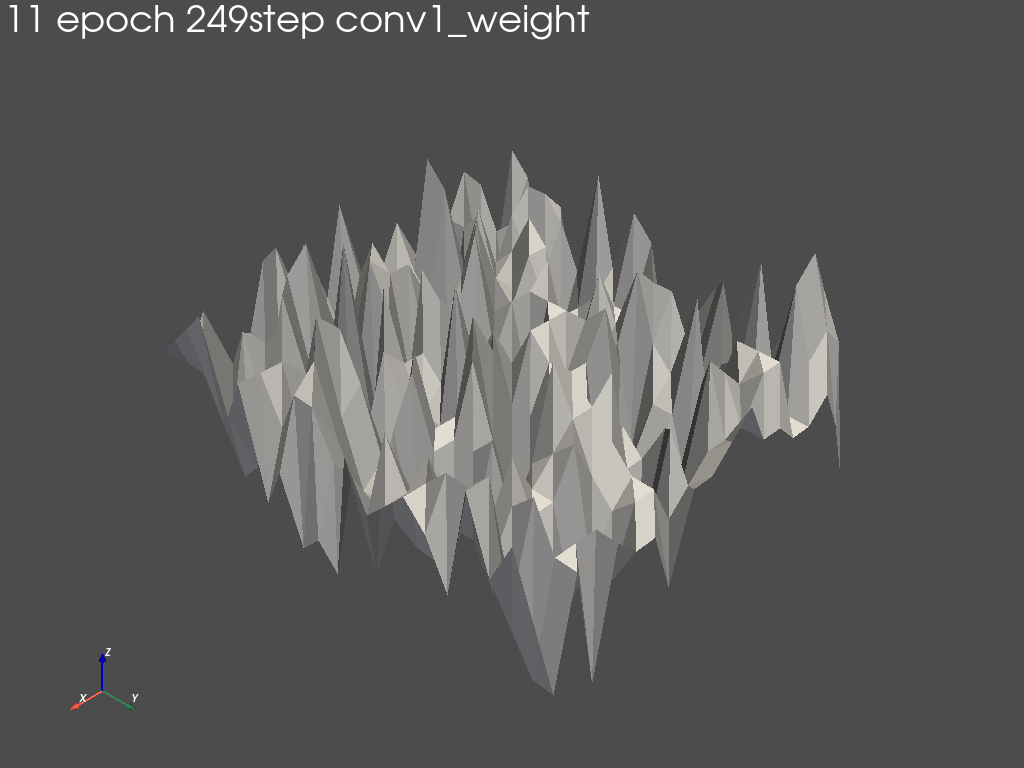

Epoch [11/20], Step [300/600], Loss: 0.0082
Epoch [11/20], Step [400/600], Loss: 0.0246


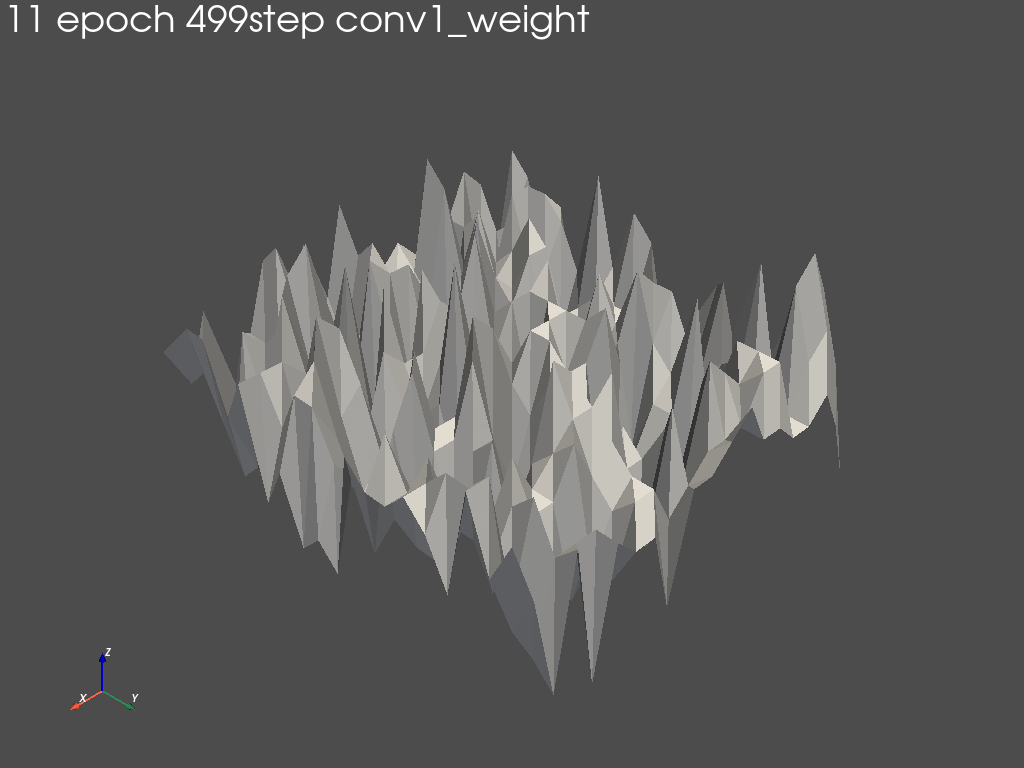

Epoch [11/20], Step [500/600], Loss: 0.0179
Epoch [11/20], Step [600/600], Loss: 0.0182
Epoch [12/20], Step [100/600], Loss: 0.0017
Epoch [12/20], Step [200/600], Loss: 0.0079


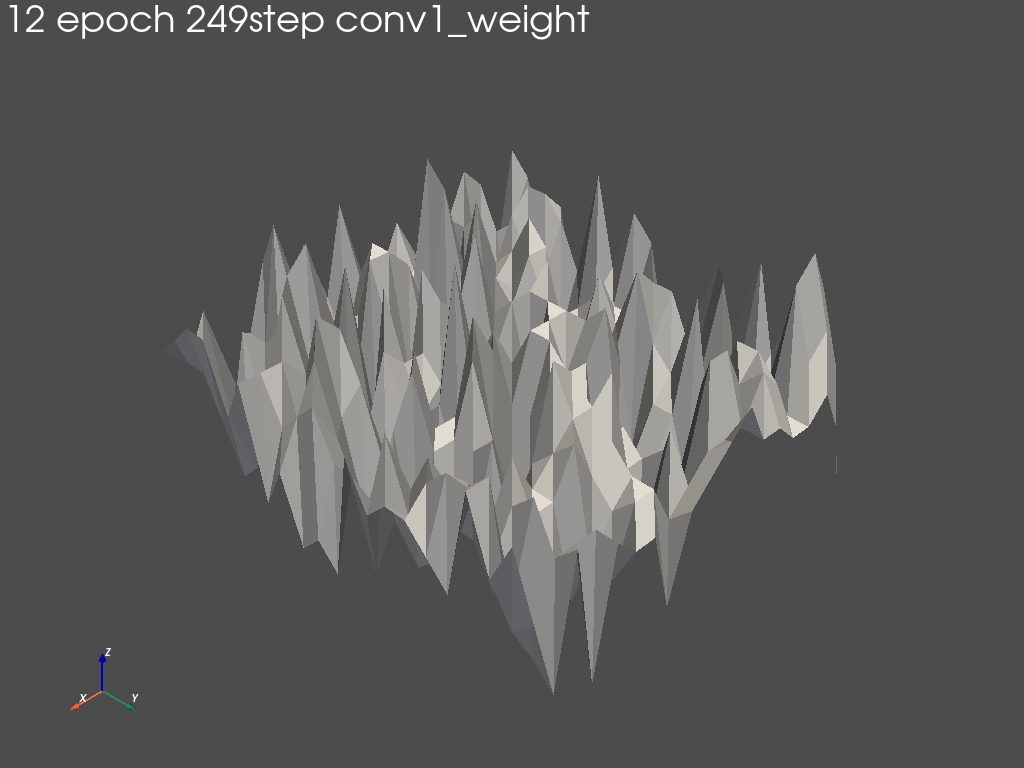

Epoch [12/20], Step [300/600], Loss: 0.0017
Epoch [12/20], Step [400/600], Loss: 0.0299


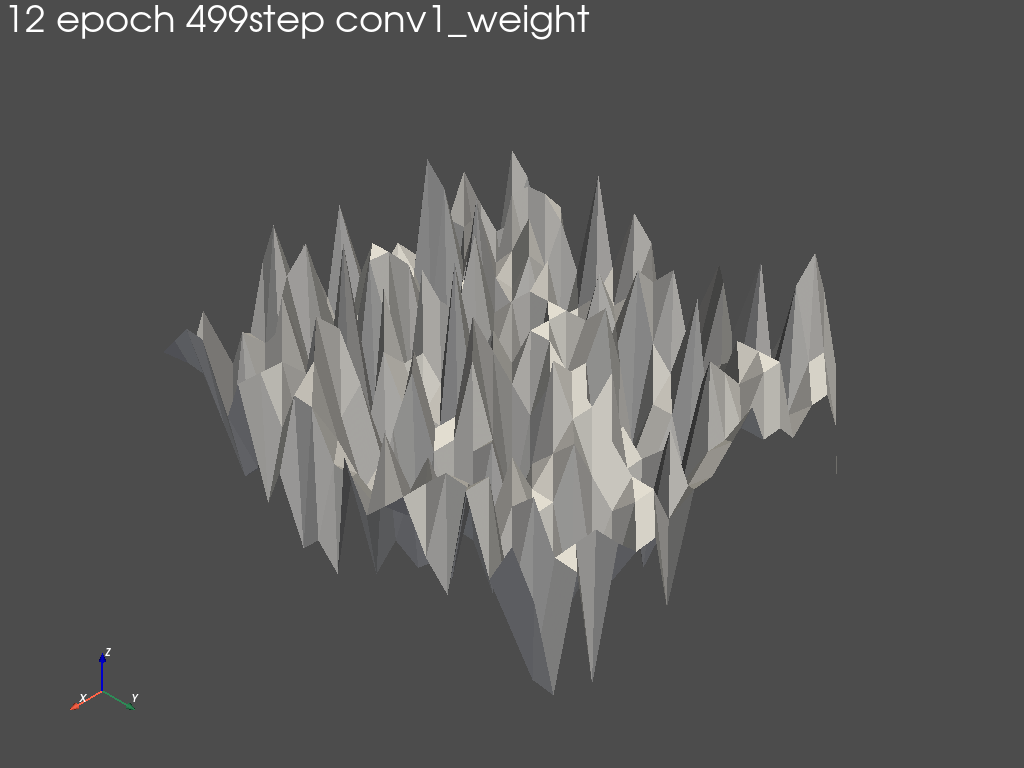

Epoch [12/20], Step [500/600], Loss: 0.0058
Epoch [12/20], Step [600/600], Loss: 0.0114
Epoch [13/20], Step [100/600], Loss: 0.0004
Epoch [13/20], Step [200/600], Loss: 0.0306


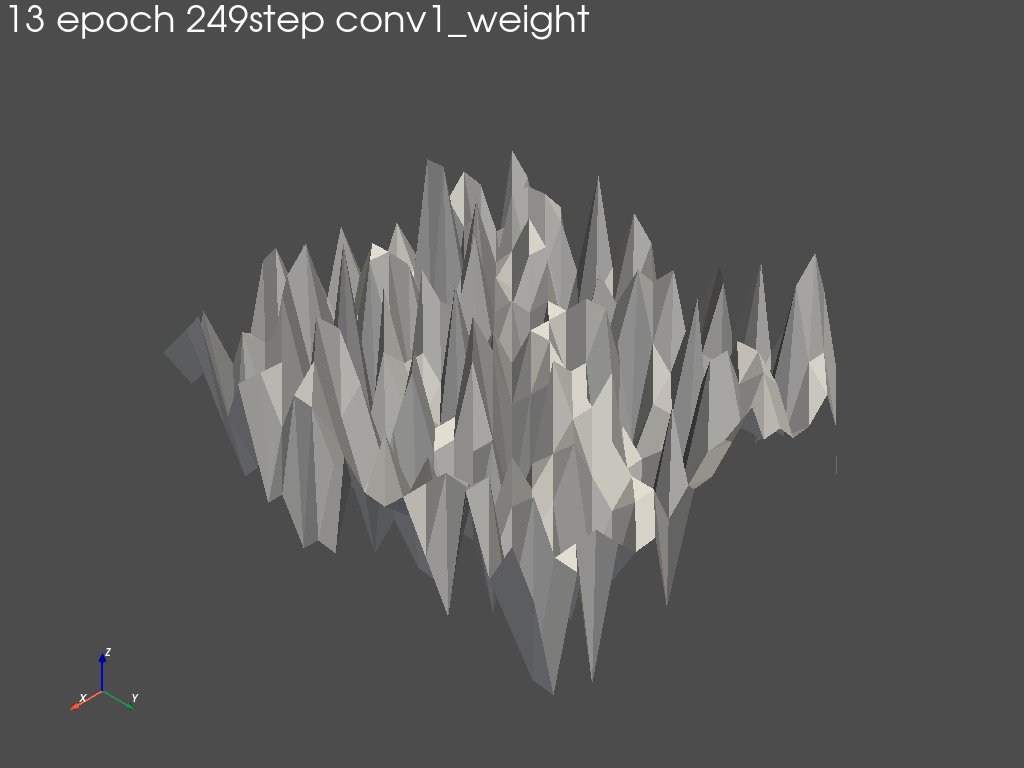

Epoch [13/20], Step [300/600], Loss: 0.0011
Epoch [13/20], Step [400/600], Loss: 0.0039


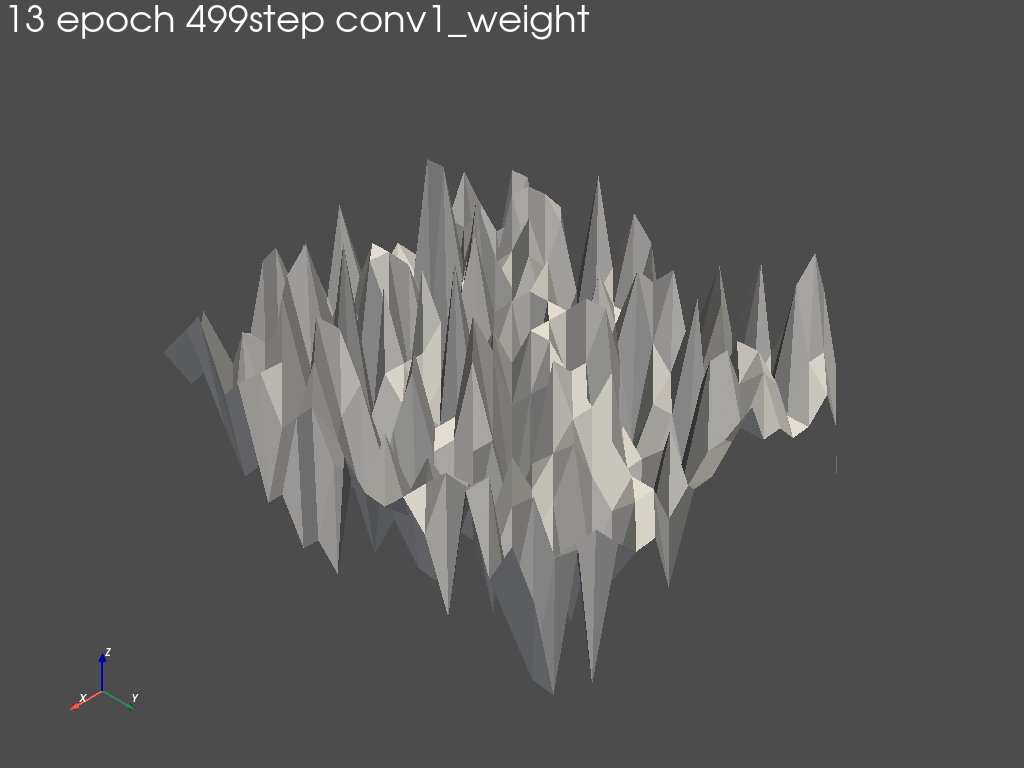

Epoch [13/20], Step [500/600], Loss: 0.0005
Epoch [13/20], Step [600/600], Loss: 0.0004
Epoch [14/20], Step [100/600], Loss: 0.0038
Epoch [14/20], Step [200/600], Loss: 0.0112


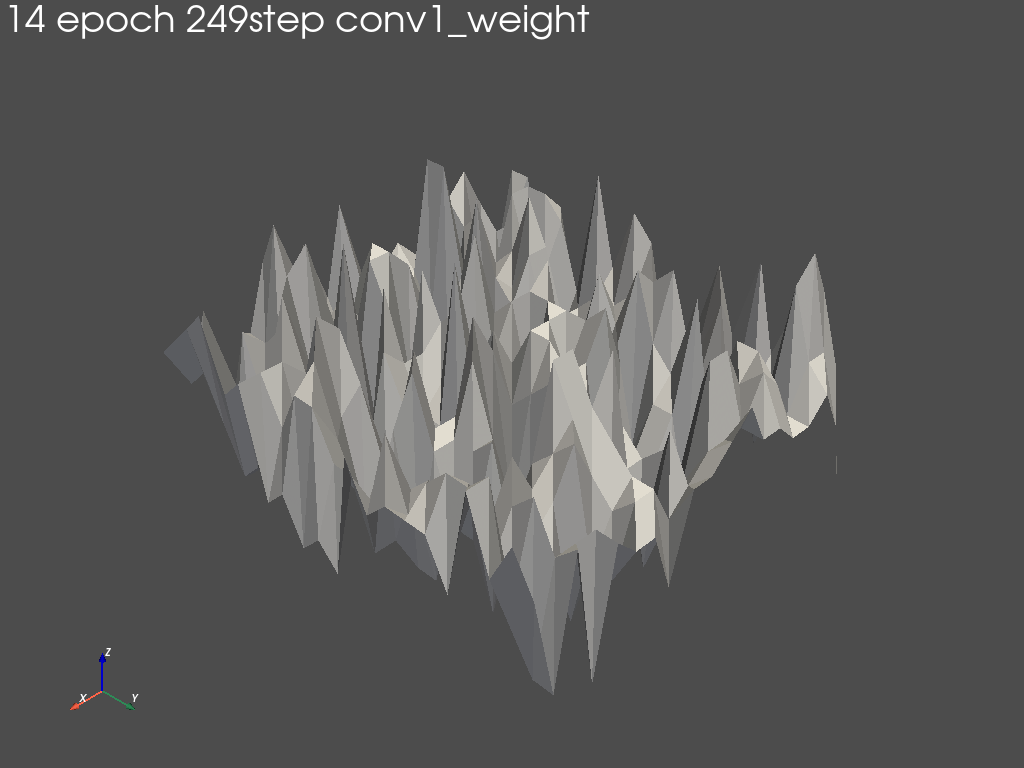

Epoch [14/20], Step [300/600], Loss: 0.0025
Epoch [14/20], Step [400/600], Loss: 0.0334


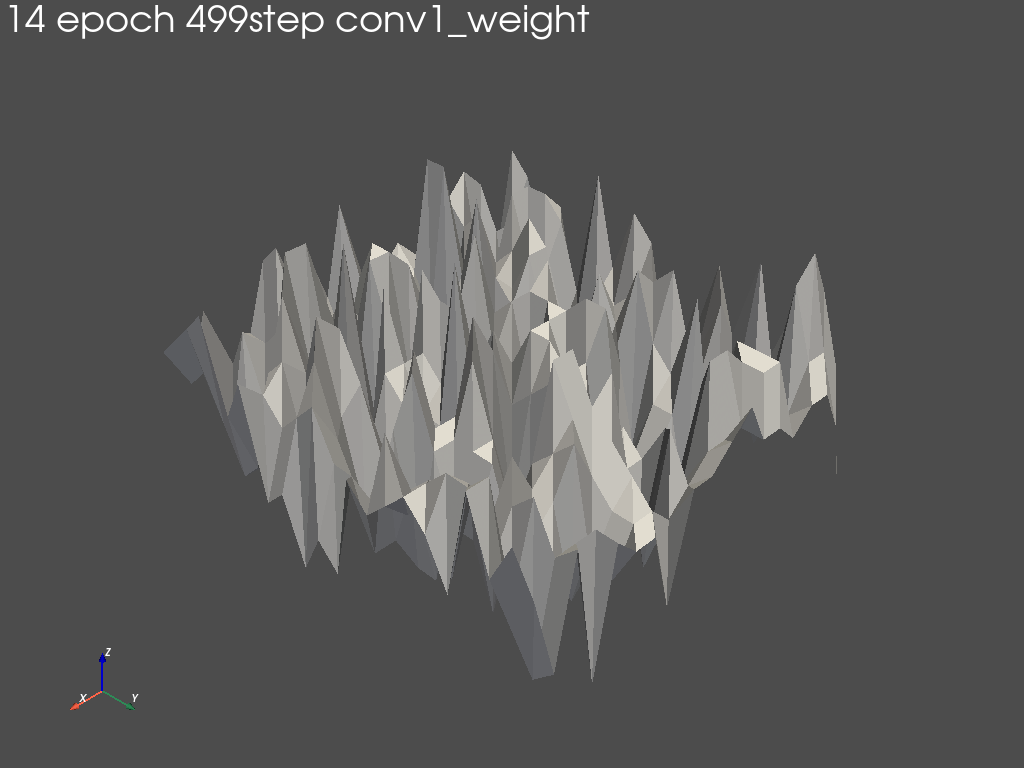

Epoch [14/20], Step [500/600], Loss: 0.0081
Epoch [14/20], Step [600/600], Loss: 0.0003
Epoch [15/20], Step [100/600], Loss: 0.0121
Epoch [15/20], Step [200/600], Loss: 0.0097


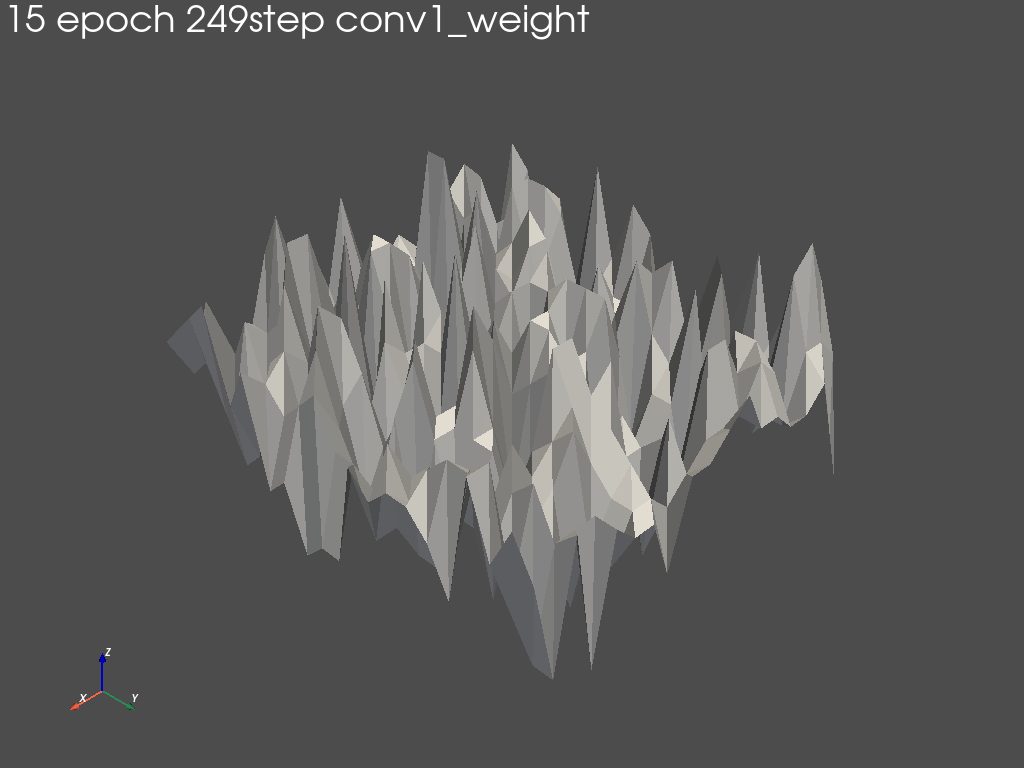

Epoch [15/20], Step [300/600], Loss: 0.0010
Epoch [15/20], Step [400/600], Loss: 0.0038


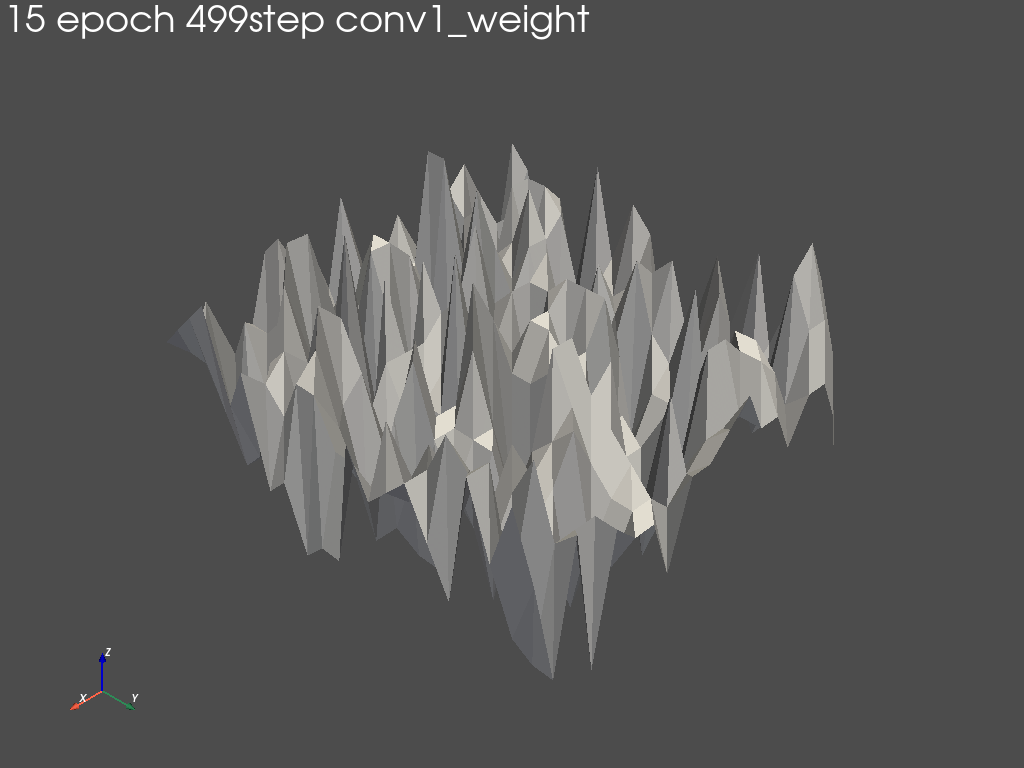

Epoch [15/20], Step [500/600], Loss: 0.0088
Epoch [15/20], Step [600/600], Loss: 0.0007
Epoch [16/20], Step [100/600], Loss: 0.0082
Epoch [16/20], Step [200/600], Loss: 0.0008


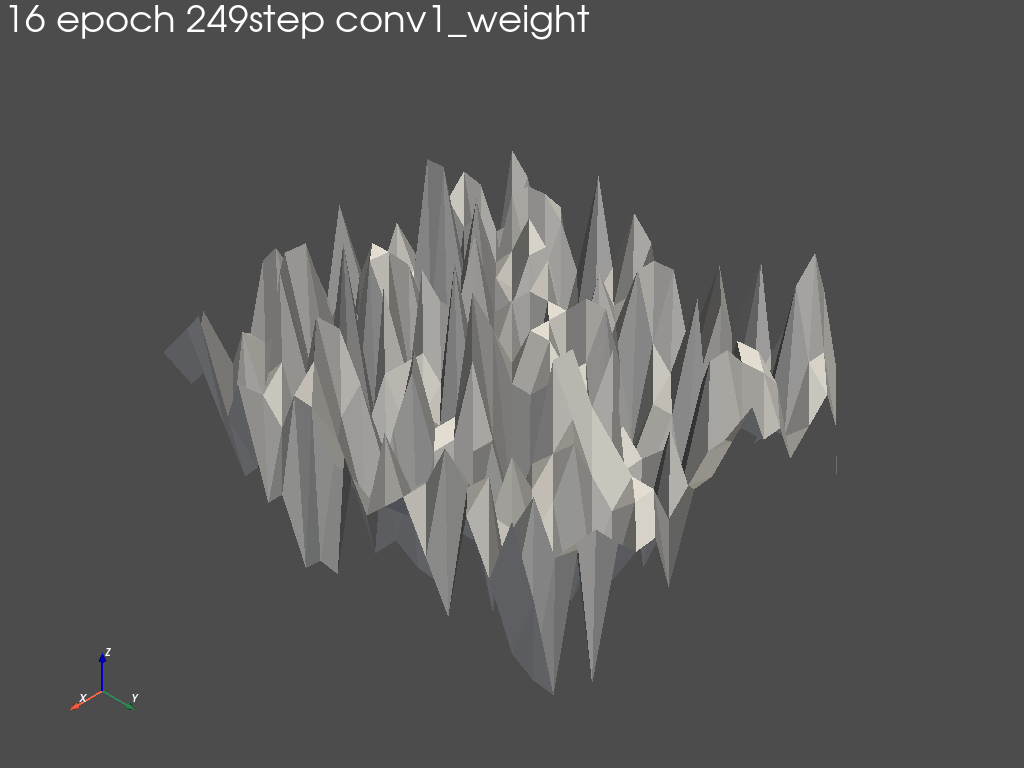

Epoch [16/20], Step [300/600], Loss: 0.0020
Epoch [16/20], Step [400/600], Loss: 0.0056


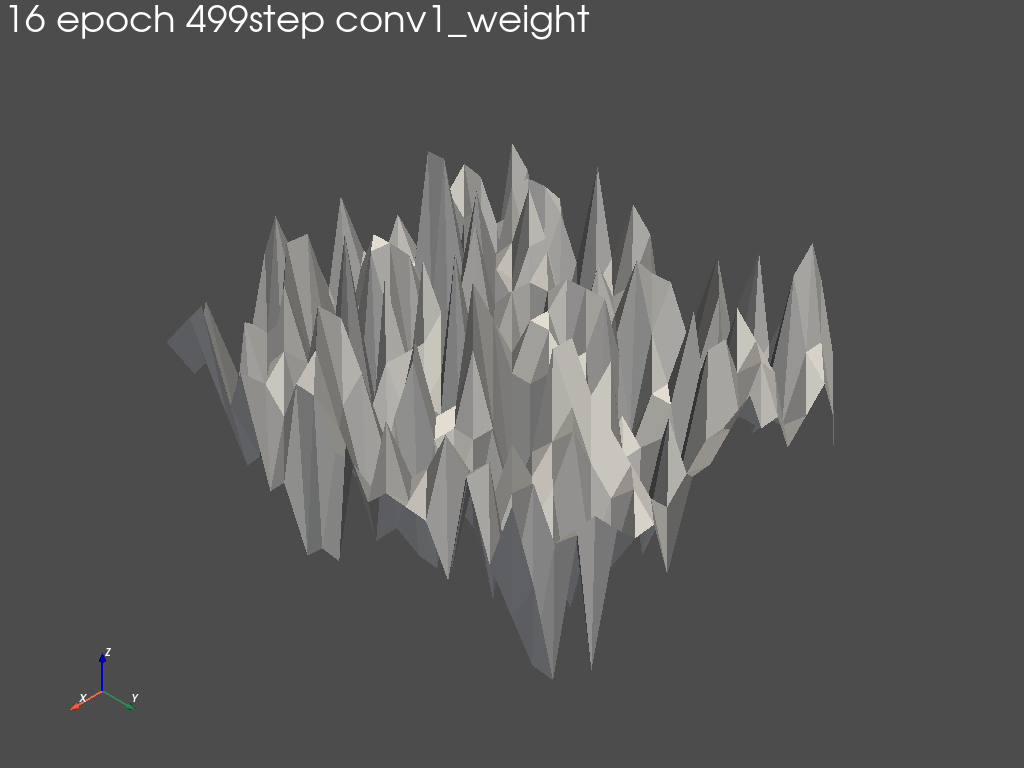

Epoch [16/20], Step [500/600], Loss: 0.0002
Epoch [16/20], Step [600/600], Loss: 0.0206
Epoch [17/20], Step [100/600], Loss: 0.0647
Epoch [17/20], Step [200/600], Loss: 0.0010


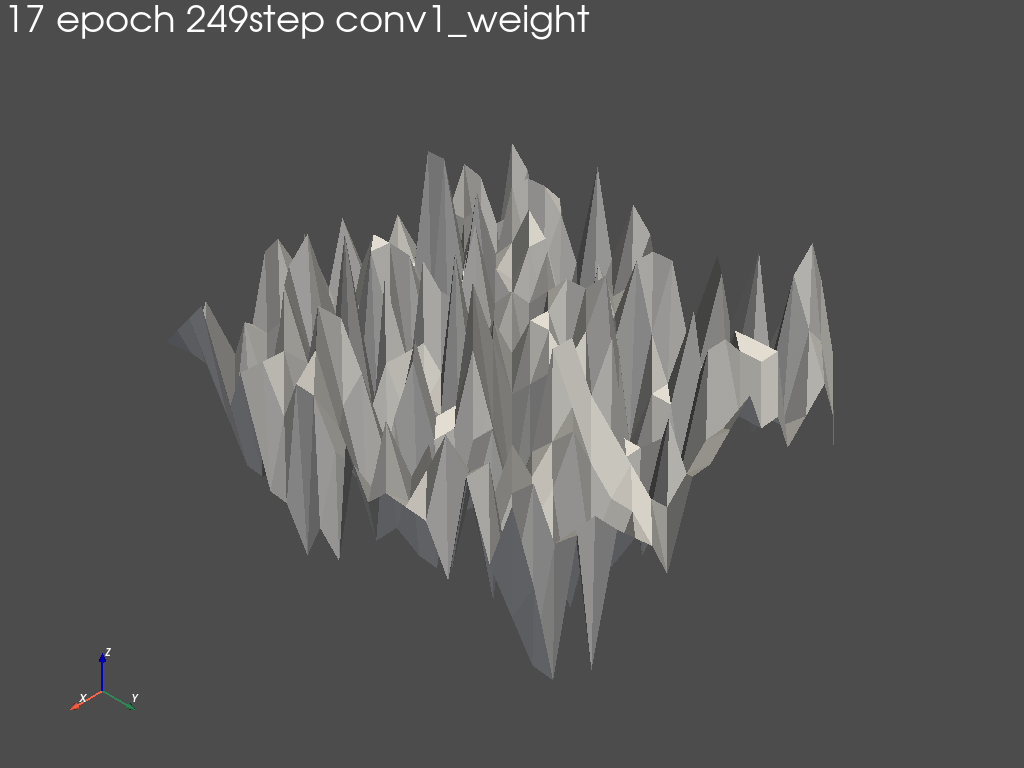

Epoch [17/20], Step [300/600], Loss: 0.0005
Epoch [17/20], Step [400/600], Loss: 0.0057


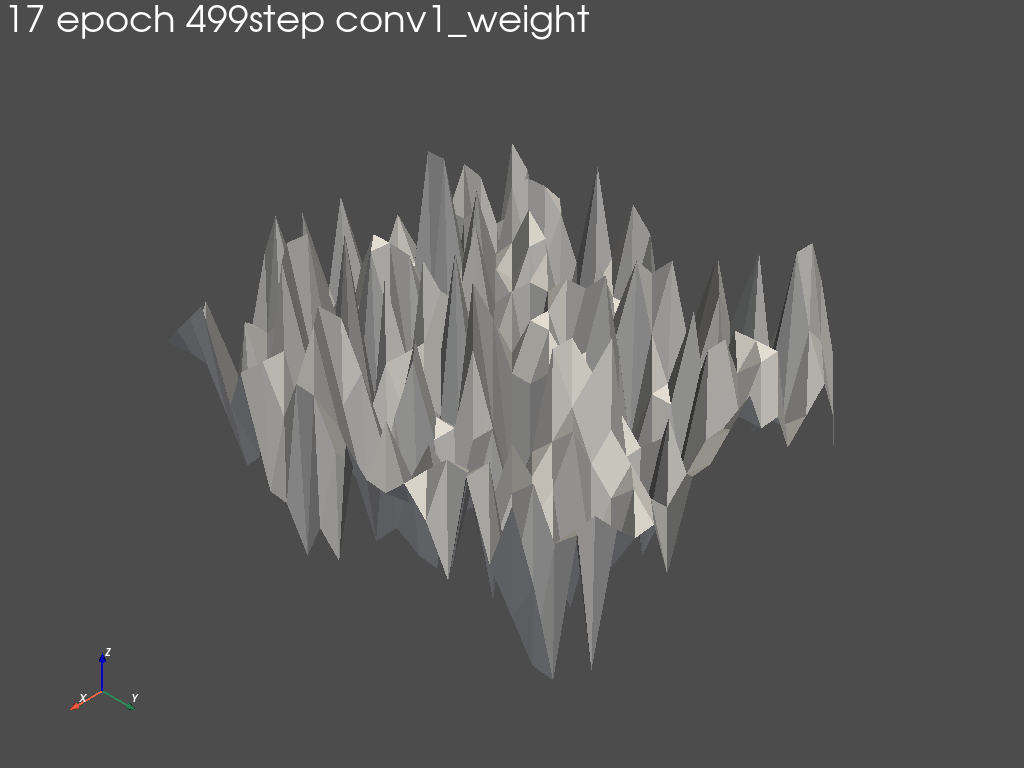

Epoch [17/20], Step [500/600], Loss: 0.0009
Epoch [17/20], Step [600/600], Loss: 0.0016
Epoch [18/20], Step [100/600], Loss: 0.0012
Epoch [18/20], Step [200/600], Loss: 0.0003


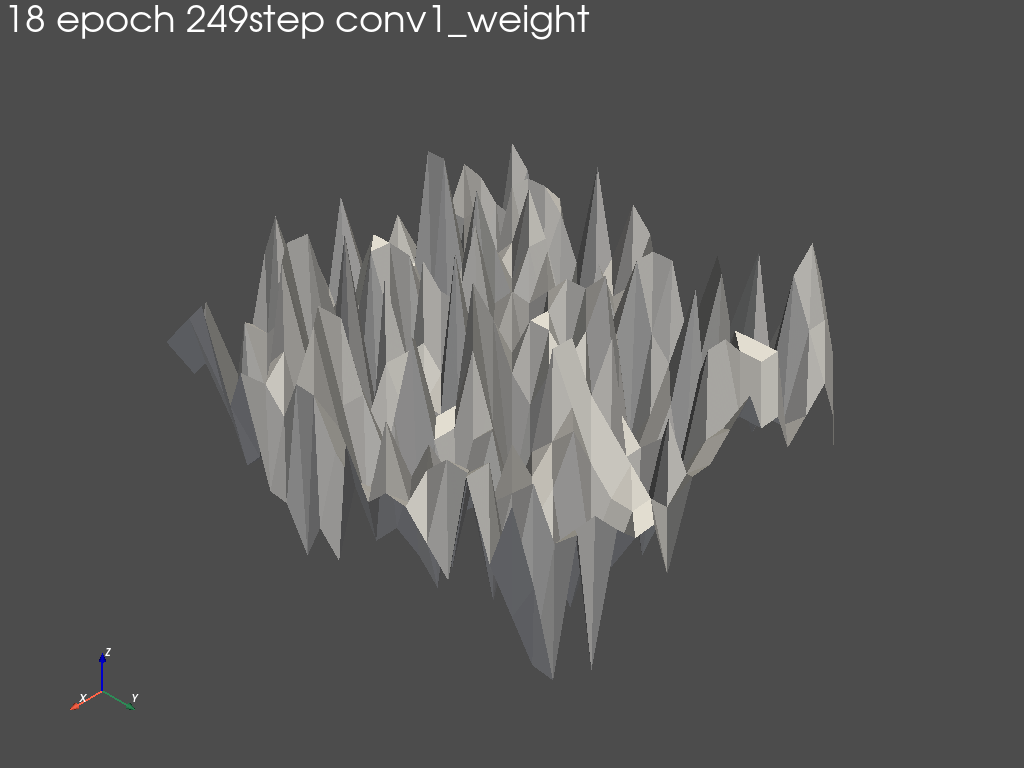

Epoch [18/20], Step [300/600], Loss: 0.0003
Epoch [18/20], Step [400/600], Loss: 0.0022


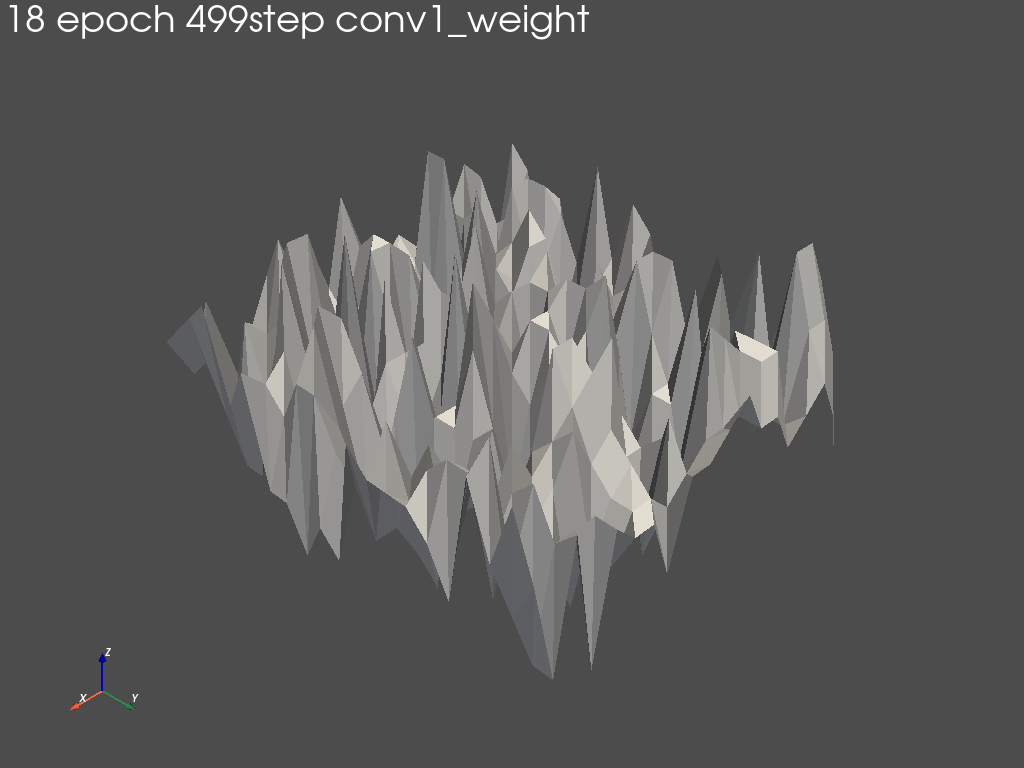

Epoch [18/20], Step [500/600], Loss: 0.0004
Epoch [18/20], Step [600/600], Loss: 0.0074
Epoch [19/20], Step [100/600], Loss: 0.0002
Epoch [19/20], Step [200/600], Loss: 0.0002


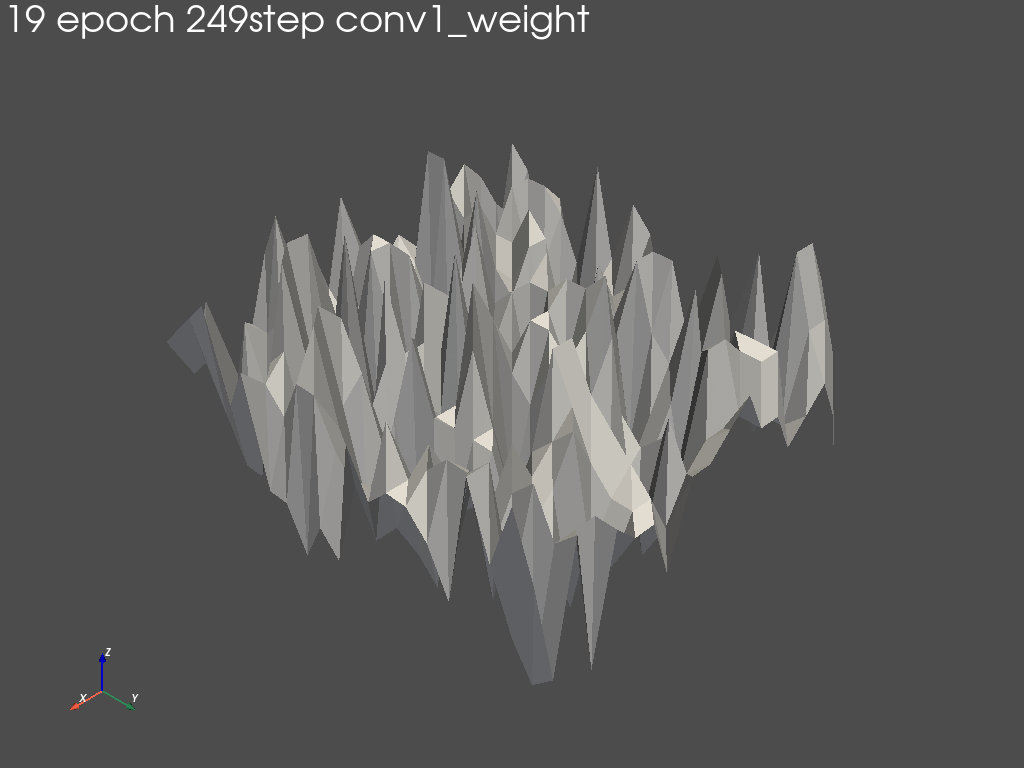

Epoch [19/20], Step [300/600], Loss: 0.0002
Epoch [19/20], Step [400/600], Loss: 0.0002


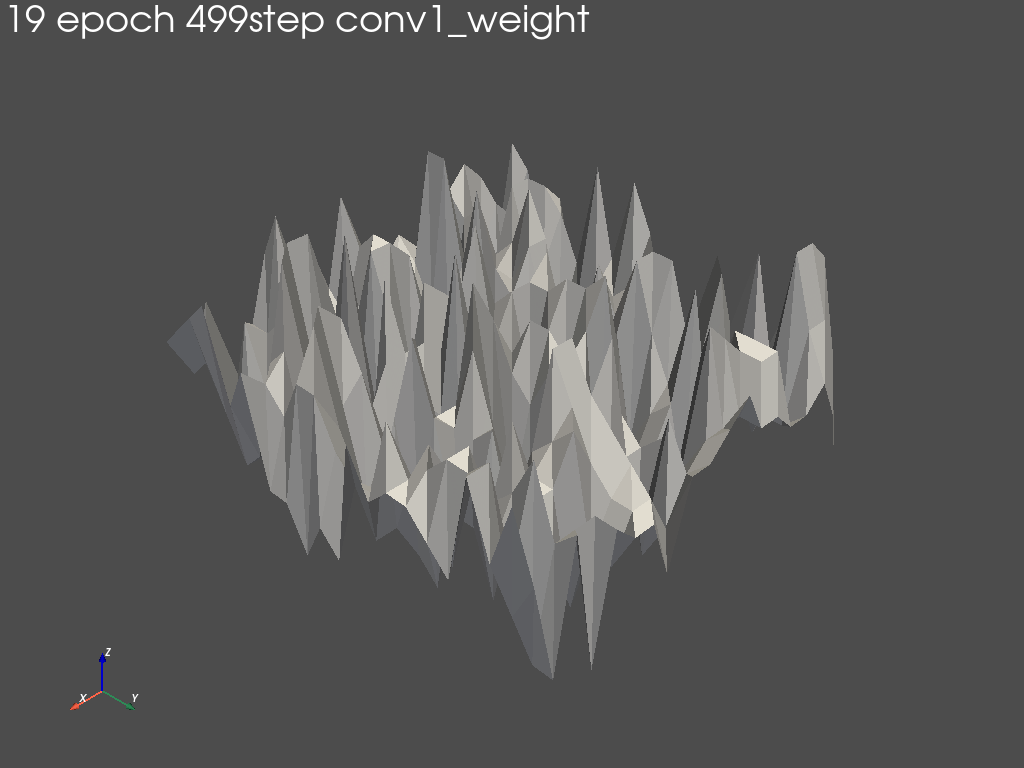

Epoch [19/20], Step [500/600], Loss: 0.0015
Epoch [19/20], Step [600/600], Loss: 0.0269
Epoch [20/20], Step [100/600], Loss: 0.0093
Epoch [20/20], Step [200/600], Loss: 0.0033


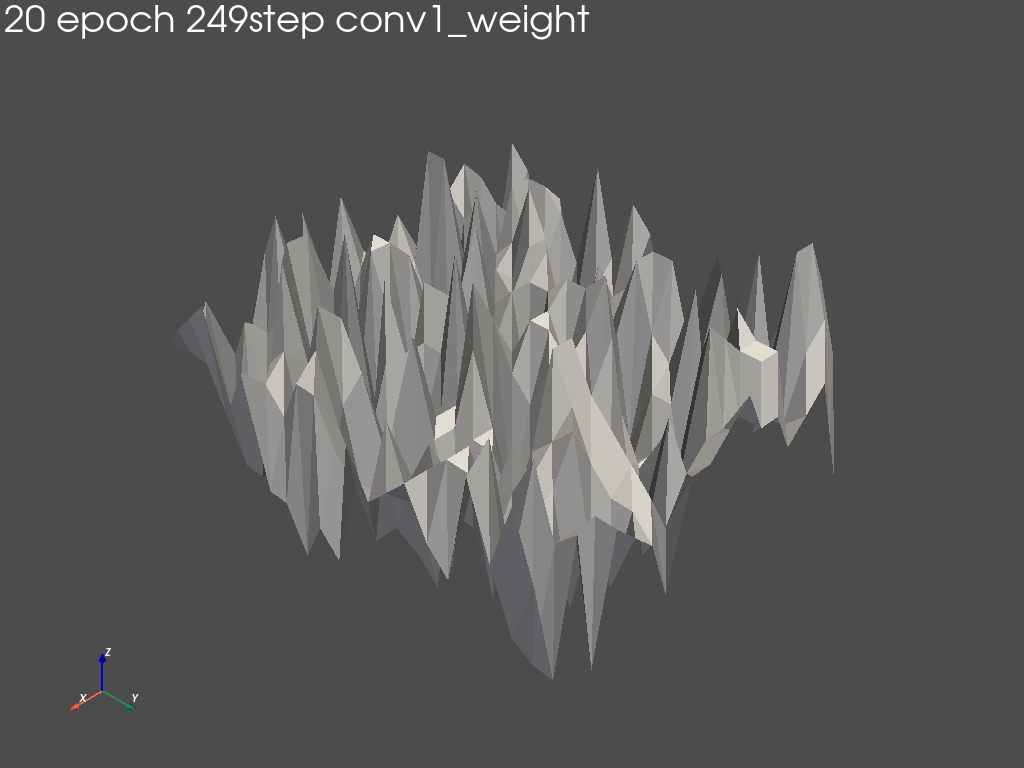

Epoch [20/20], Step [300/600], Loss: 0.0004
Epoch [20/20], Step [400/600], Loss: 0.0011


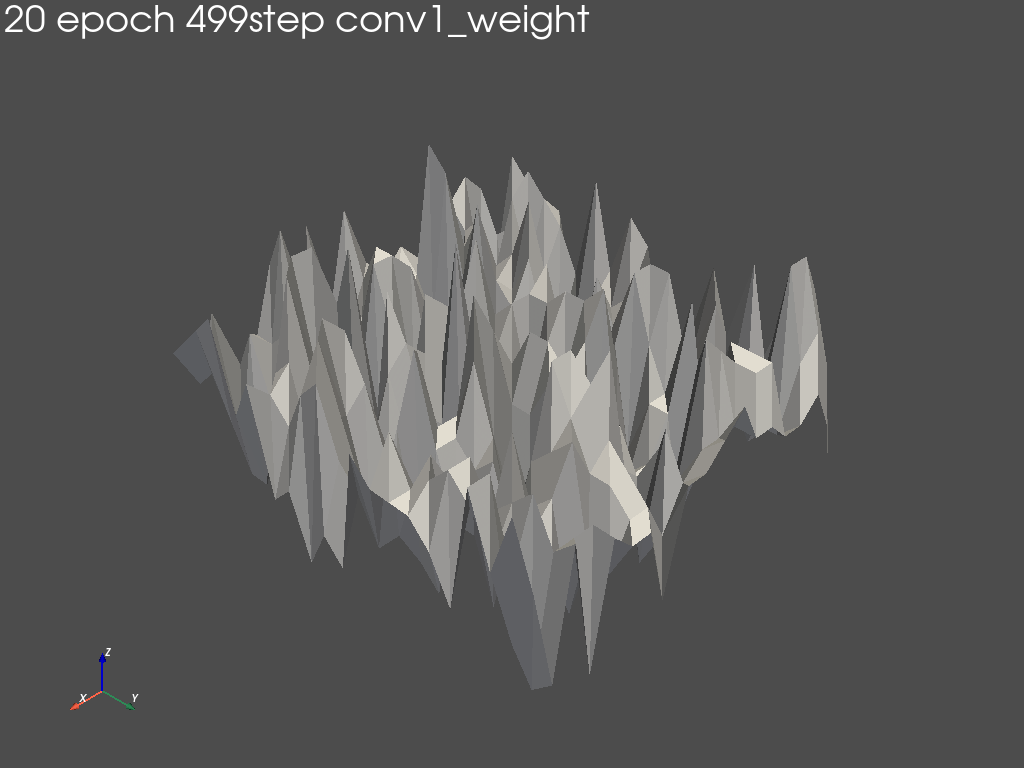

Epoch [20/20], Step [500/600], Loss: 0.0007
Epoch [20/20], Step [600/600], Loss: 0.0008


In [23]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# basic block 
x = np.arange(0, 20, 1)
y = np.arange(0, 20, 1)
x, y = np.meshgrid(x, y)
CONV_BLOCK = np.zeros((20,20))
GRAD_BLOCK = np.zeros((20,20))
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        
        # weight value save
        if (i+1) % 250 == 0:
            BLOCK_VALUE = model.conv1.weight.cpu().detach().numpy()

            for index in range(0,16):
                x =  ((index)%4)*5 
                y =  (index//4)*5
                CONV_BLOCK[x:x+5, y:y+5] =BLOCK_VALUE[index][0] 

            z = CONV_BLOCK*20

            x = np.arange(0, 20, 1)
            y = np.arange(0, 20, 1)
            x, y = np.meshgrid(x, y)

            grid = pv.StructuredGrid(x, y, z)

            name = "conv/"+str(epoch)+"epoch"+ str(i)+"step"+".png"
            grid_name = str(epoch+1) +" epoch " + str(i)+"step conv1_weight"

            grid.plot(off_screen=True, screenshot=name,text =grid_name)

        
        loss.backward()
        
        
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))


In [24]:
# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Test Accuracy of the model on the 10000 test images: 98.84 %


In [25]:
# to gif
# Create the frames
frames = []
imgs = glob.glob("conv/*.png")
dex = 0
for i in imgs:
    new_frame = Image.open(i)
    new_frame = new_frame.resize((960,700))
    frames.append(new_frame)
    dex+=1
    

# Save into a GIF file that loops forever
frames[0].save('conv_weight.gif', format='GIF',append_images=frames[1:],save_all=True, duration=10,loop=0)
